(EJMETSIMPLEXREDES)=

# 4.3 Ejemplo del método símplex en redes

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

En esta nota se revisa un ejemplo del uso del método símplex aplicado a problemas de redes con capacidades (variables de decisión con cotas superiores) se utilizarán las {ref}`Definiciones generales de flujo en redes <DGFLUJOREDES>` y  el ejemplo de {ref}`flujo en redes <EJFLUJOENREDESYPL>` añadiendo capacidad a los arcos $(A, B)$ y $(C, E)$ igual a $10$ y $80$ respectivamente:

In [1]:
import copy
import pprint

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                               G_to_plot, nodes_position,
                                               nodes_position_modified,
                                               node_labels,
                                               string_for_edges_trouble_to_visualize,
                                               list_of_edges_trouble_to_visualize):
    if figsize_tuple:
        plt.figure(figsize=figsize_tuple)
        
    nx.draw_networkx_edges(G_to_plot, pos=nodes_position, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                           edgelist=G_to_plot.edges())
    nx.draw_networkx_edge_labels(G_to_plot, pos=nodes_position, 
                                 font_size=10)  
    nx.draw_networkx_edges(G_to_plot, pos=nodes_position, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                           edgelist=list_of_edges_trouble_to_visualize)
    
    nx.draw_networkx_edge_labels(G_to_plot, pos=nodes_position, 
                                 edge_labels=string_for_edges_trouble_to_visualize,
                                 font_size=10)
    nx.draw_networkx_labels(G_to_plot, pos=nodes_position_modified, 
                            labels=node_labels)
    nx.draw_networkx_nodes(G_to_plot, pos=nodes_position, 
                           node_size=1000)
    plt.axis("off")
    plt.show()
def plot_graph(figsize_tuple, G_to_plot,
               nodes_position,
               nodes_position_modified,
               nodes_labels,
               edge_labels):
  
    if figsize_tuple:
        plt.figure(figsize=figsize_tuple)
        
    nx.draw_networkx_edges(G_to_plot, pos=nodes_position, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1")
    nx.draw_networkx_edge_labels(G_to_plot, pos=nodes_position,
                                 edge_labels=edge_labels,
                                 font_size=10)  
    nx.draw_networkx_labels(G_to_plot, pos=nodes_position_modified,
                            labels=nodes_labels)
    nx.draw_networkx_nodes(G_to_plot, pos=nodes_position, 
                           node_size=1000, alpha=0.6)
    plt.axis("off")
    plt.show()
    

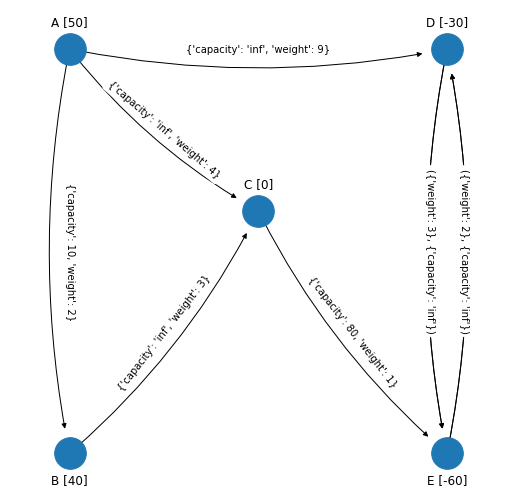

In [3]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"weight": 2, "capacity": 10},
                             ('A', 'C'): {"weight": 4, "capacity": "inf"},
                             ('A', 'D'): {"weight": 9, "capacity": "inf"},
                             ('B', 'C'): {"weight": 3, "capacity": "inf"},
                             ('C', 'E'): {"weight": 1, "capacity": 80},
                             ('E', 'D'): {"weight": 2, "capacity": "inf"},
                             ('D', 'E'): {"weight": 3, "capacity": "inf"}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
    G_min_cost_flow[e[0]][e[1]]["capacity"] = edge_labels_min_cost_flow[e]["capacity"]
    G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]


n1 = G_min_cost_flow['E']['D']
n2 = G_min_cost_flow['D']['E']

n1["weight"] = 2
n1["capacity"] = "inf"

n2["weight"] = 3
n2["capacity"]= "inf"


stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},)}'
string_for_edges_trouble_to_visualize_min_cost_flow = {('D', 'E'): ''.join([stri1, stri2, stri3])}

list_of_edges_trouble_to_visualize_min_cost_flow = [('D', 'E'), ('E', 'D')]
    
node_labels_min_cost_flow = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = copy.deepcopy(nodes_and_pos)

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        

figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_min_cost_flow, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_min_cost_flow,
                                           string_for_edges_trouble_to_visualize_min_cost_flow,
                                           list_of_edges_trouble_to_visualize_min_cost_flow)

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

Al lado de cada nodo en corchetes se presenta el flujo neto generado por el nodo. Los nodos origen tienen un flujo neto positivo y en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen un flujo neto negativo que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene flujo neto igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos.

Entonces el modelo de PL que minimiza el costo de transferencia de flujo de modo que el **flujo neto** satisfaga lo representado en la red, considerando el flujo neto como el flujo total que sale del nodo menos el flujo total que entra al nodo es:

$$\displaystyle \min 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{AB} \leq 10, x_{CE} \leq 80$$

$$x_{ij} \geq 0 \forall i,j$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$.

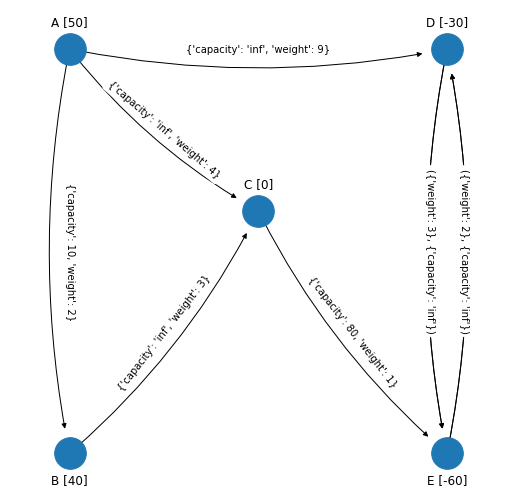

In [4]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_min_cost_flow, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_min_cost_flow,
                                           string_for_edges_trouble_to_visualize_min_cost_flow,
                                           list_of_edges_trouble_to_visualize_min_cost_flow)

La red solución (omitiendo arcos con flujo igual a cero) es:

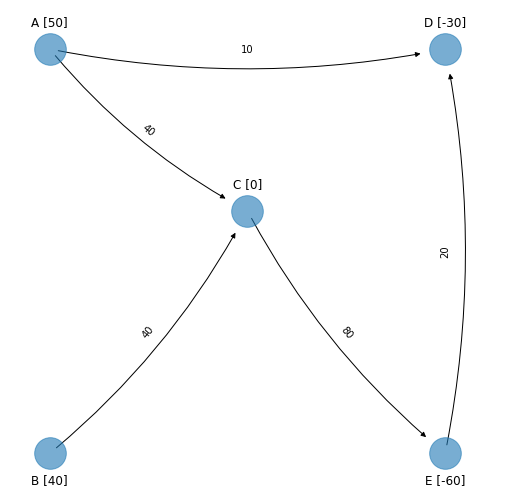

In [6]:
G_min_cost_flow_solution = nx.DiGraph()

#G_min_cost_flow_solution.add_nodes_from(nodes)

G_min_cost_flow_solution.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow_solution.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow_solution.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow_solution.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow_solution.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_flows = {('A', 'C'): 40,
              ('A', 'D'): 10,
              ('B', 'C'): 40,
              ('C', 'E'): 80,            
              ('E', 'D'): 20
              }

G_min_cost_flow_solution.add_edges_from(edge_flows)
node_labels_min_cost_flow_solution = nx.get_node_attributes(G_min_cost_flow_solution, "node_and_demand")

figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_min_cost_flow_solution,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_min_cost_flow_solution,
           edge_flows)

```{margin}

Tal solución se puede verificar utilizando el paquete *Networkx* y ejecutar las instrucciones en el ejemplo de {ref}`flujo con costo mínimo <EJREDFLUJOCOSTOMIN>`, en estas instrucciones se utiliza la función [network_simplex](https://networkx.org/documentation/stable/reference/algorithms/flow.html#network-simplex).

```

La designación del flujo anterior entre todos los nodos incurre en un costo de $490$.

## Arcos básicos y no básicos

Supóngase que se tienen $n$ nodos en una red. Se tienen las siguientes definiciones y resultados:

* Toda solución básica factible con $n$ nodos tiene $n-1$ variables básicas que representan el flujo por el arco respectivo. Esto resulta de tener una matriz de incidencia con rank igual a $n-1$, ver {ref}`representación de redes: matriz de incidencia nodo-arco<MATINCIDNODOARCO>`.

* Los $n-1$ arcos correspondientes a las variables básicas se les nombra **arcos básicos** y los que corresponden a las variables no básicas son **arcos no básicos.**

* Cualquier conjunto de $n-1$ arcos forma un *spanning tree*, ver {ref}`arborescencia y spanning tree<ARBORYSPANTREE>`.

* Una solución del PL a partir de un *spanning tree* se obtiene igualando las variables correspondientes a sus *nontree arcs* a cero y sus variables correspondientes a sus *tree arcs* de acuerdo al sistema de ecuaciones lineales conformado por las restricciones de los nodos. 

* Un *spanning tree* factible es un *spanning tree* cuya solución a partir de las restricciones de los nodos también satisface todas las demás restricciones (por ejemplo no negatividad y cotas superiores).

* Las soluciones básicas son soluciones del PL a partir de un *spanning tree* y las soluciones BF son *spanning trees* factibles.

## Técnica de la cota superior

**explicación de la técnica de la cota superior o partir de una solución BF, luego llegar a la siguiente red utilizando el método de símplex de redes.**

En este ejemplo se tienen cotas superiores como: $x_{AB} \leq 10$ o $x_{CE} \leq 80$ por lo que una adaptación a lo revisado en el {ref}`ejemplo del método símplex<EJMETSIMPLEX>` al PL de antes es la técnica de la cota superior. 

La idea de la técnica es considerar que el **arco básico** que debido a un incremento llegue a un flujo igual al de su cota superior, sea **reemplazado** por un arco en dirección contraria con la misma capacidad y con costo igual al negativo del arco original. Además los flujos netos de los nodos deben ajustarse a este cambio.

```{admonition} Comentarios

* Una interpretación de sustituir el arco que tiene un flujo igual a su cota superior por otro en dirección contraria es que el flujo del arco en dirección contraria "cancela" el flujo del arco original. Además un costo igual al negativo del arco original se interpreta como un "ahorro" en la transferencia del flujo.

* El arco original se mantiene como básico con flujo igual a su cota superior y el arco en dirección contraria se considera como no básico. En iteraciones posteriores el arco original aunque es básico no se considera en el análisis para ser sustituido.

```

## Inicio del ejemplo

Para comprender la técnica de la cota superior supóngase que en alguna iteración $x_{AB}$ se convirtió en la variable básica que será sustituida pues alcanzó su cota superior de $10$. Por tanto el arco $x_{AB}$ se sustituye por $x_{AB} = 10 - y_{BA}$ con $y_{BA}=0$ y por tanto es una variable no básica "nueva". Entonces se sustituye el arco $(A,B)$ por el arco $(B,A)$ el cual tiene un flujo de $y_{BA}$ con capacidad de $10$ y un costo unitario de $-2$. También $b_B$ aumenta de $40$ a $50$ y $b_A$ disminuye de $50$ a $40$:

In [7]:
new_demand_B = G_min_cost_flow['A']['B']["capacity"] + nx.get_node_attributes(G_min_cost_flow, "demand")['B']

In [8]:
print(new_demand_B)

50


In [9]:
new_demand_A = nx.get_node_attributes(G_min_cost_flow, "demand")['A'] - G_min_cost_flow['A']['B']["capacity"]

In [10]:
print(new_demand_A)

40


```{margin}

Red original del problema:

```

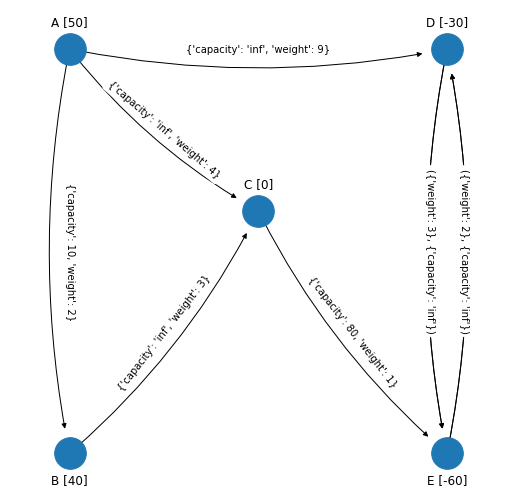

In [11]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_min_cost_flow, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_min_cost_flow,
                                           string_for_edges_trouble_to_visualize_min_cost_flow,
                                           list_of_edges_trouble_to_visualize_min_cost_flow)

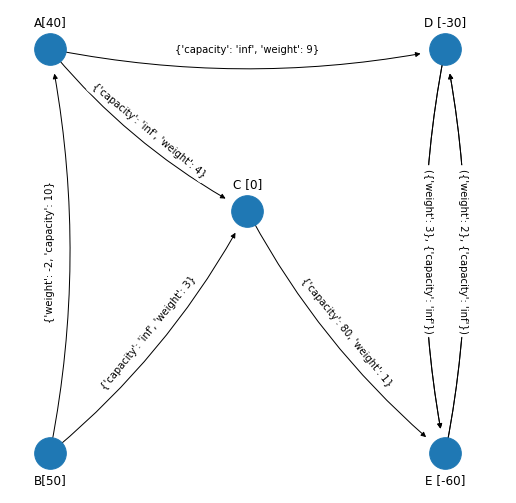

In [12]:
G_simplex = G_min_cost_flow.copy()
G_simplex.remove_edge('A','B')
G_simplex.add_edge('B','A')
G_simplex['B']['A']["weight"] = -G_min_cost_flow['A']['B']["weight"]
G_simplex['B']['A']["capacity"] = G_min_cost_flow['A']['B']["capacity"]

node_and_demand_B = "".join(['B', '[', str(new_demand_B),']'])
node_and_demand_A = "".join(['A', '[', str(new_demand_A),']'])

nx.set_node_attributes(G_simplex, {'B': {"demand": 50,
                                         "node_and_demand": node_and_demand_B},
                                   'A': {"demand": 40,
                                         "node_and_demand": node_and_demand_A},                                   
                                   })

node_labels_simplex = nx.get_node_attributes(G_simplex, "node_and_demand")

string_for_edges_trouble_to_visualize_simplex = string_for_edges_trouble_to_visualize_min_cost_flow

list_of_edges_trouble_to_visualize_simplex = list_of_edges_trouble_to_visualize_min_cost_flow

figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

Para futura referencia el arco $(A,B)$ que alcanzó la cota superior lo guardamos en la red `G_simplex_edges_upper_bounds` (e iremos guardando los arcos que lleguen a tales cotas):

In [13]:
def fill_edge_for_graph_of_upper_bounds(G_to_be_filled, edge_to_be_added, dict_reference):
    G_to_be_filled[edge_to_be_added[0]][edge_to_be_added[1]]["weight"] = dict_reference["weight"]
    G_to_be_filled[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"] = dict_reference["capacity"]
    G_to_be_filled[edge_to_be_added[0]][edge_to_be_added[1]]["flow"] = dict_reference["flow"]
def add_edge_to_graph_of_upper_bounds(G_reference, G_simplex_edges_upper_bounds,
                                      edge_to_be_added,
                                      dict_edge_labels):

    G_simplex_edges_upper_bounds.add_edge(edge_to_be_added[0],
                                          edge_to_be_added[1])
    dict_edge_labels[edge_to_be_added] = {}
    dict_edge_labels[edge_to_be_added]["weight"] = G_reference[edge_to_be_added[0]][edge_to_be_added[1]]["weight"]
    dict_edge_labels[edge_to_be_added]["capacity"] = G_reference[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"]
    dict_edge_labels[edge_to_be_added]["flow"] = G_reference[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"]
    fill_edge_for_graph_of_upper_bounds(G_simplex_edges_upper_bounds,
                                        edge_to_be_added, 
                                        dict_edge_labels[edge_to_be_added])
    demand_node1 = nx.get_node_attributes(G_reference, "demand")[edge_to_be_added[0]]
    demand_node_and_demand1 = nx.get_node_attributes(G_reference, "node_and_demand")[edge_to_be_added[0]]
    demand_node2 = nx.get_node_attributes(G_reference, "demand")[edge_to_be_added[1]]
    demand_node_and_demand2 = nx.get_node_attributes(G_reference, "node_and_demand")[edge_to_be_added[1]]
    nx.set_node_attributes(G_simplex_edges_upper_bounds, {edge_to_be_added[0]: {"demand": demand_node1,
                                                                "node_and_demand": demand_node_and_demand1},
                                                          edge_to_be_added[1]: {"demand": demand_node2,
                                                                "node_and_demand": demand_node_and_demand2}
                                                         })
    return G_simplex_edges_upper_bounds

In [14]:
edge_to_be_added_in_graph_of_upper_bounds = ('A','B')

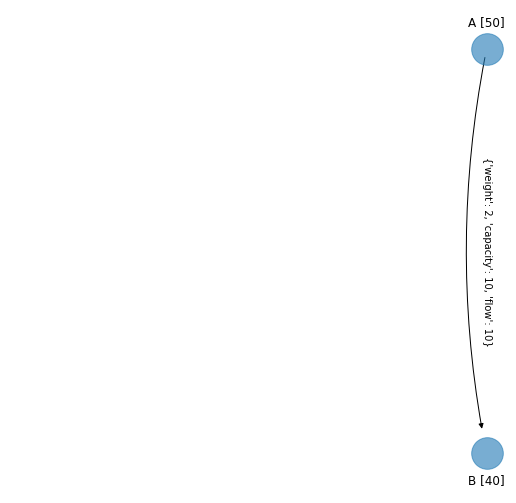

In [15]:
edge_labels_simplex_upper_bounds = {}
G_simplex_edges_upper_bounds = nx.DiGraph()
G_simplex_edges_upper_bounds.add_node(edge_to_be_added_in_graph_of_upper_bounds[0])
G_simplex_edges_upper_bounds.add_node(edge_to_be_added_in_graph_of_upper_bounds[1])

G_simplex_edges_upper_bounds = add_edge_to_graph_of_upper_bounds(G_min_cost_flow,
                                                                 G_simplex_edges_upper_bounds,
                                                                 edge_to_be_added_in_graph_of_upper_bounds,
                                                                 edge_labels_simplex_upper_bounds)

node_labels_simplex_upper_bounds = nx.get_node_attributes(G_simplex_edges_upper_bounds, "node_and_demand")

figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_edges_upper_bounds,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_upper_bounds,
           edge_labels_simplex_upper_bounds)

Considérese el siguiente *spanning tree* factible de ésta red:

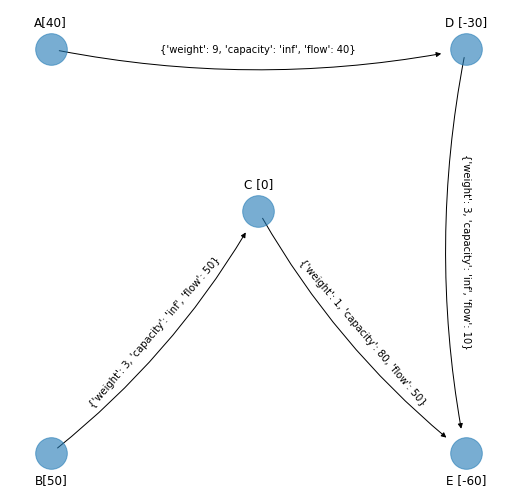

In [16]:
G_simplex_spanning_tree_1 = G_simplex.copy()
G_simplex_spanning_tree_1.remove_edge('B','A')
G_simplex_spanning_tree_1.remove_edge('A', 'C')
G_simplex_spanning_tree_1.remove_edge('E', 'D')

list_edges_spanning_tree_1 = G_simplex_spanning_tree_1.edges()

edge_labels_simplex_spanning_tree_1 = {}

for e in list_edges_spanning_tree_1:
    edge_labels_simplex_spanning_tree_1[e] = copy.deepcopy(edge_labels_min_cost_flow[e])
     
edge_labels_simplex_spanning_tree_1[('A', 'D')]["flow"] = 40
edge_labels_simplex_spanning_tree_1[('B', 'C')]["flow"] = 50
edge_labels_simplex_spanning_tree_1[('C', 'E')]["flow"] = 50
edge_labels_simplex_spanning_tree_1[('D', 'E')]["flow"] = 10

for e in G_simplex_spanning_tree_1.edges():
    G_simplex_spanning_tree_1[e[0]][e[1]]["flow"] = edge_labels_simplex_spanning_tree_1[e]["flow"]


node_labels_simplex_spanning_tree_1 = nx.get_node_attributes(G_simplex_spanning_tree_1, 
                                                            "node_and_demand")
    
figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_spanning_tree_1,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_1,
           edge_labels_simplex_spanning_tree_1)


Los valores anteriores de flujo se pueden obtener resolviendo las siguientes ecuaciones de igualdad que resultan con el cambio $x_{AB} = 10 - y_{BA}$ y considerando arcos no básicos: $y_{AB}, x_{AC}, x_{ED}$ que tienen valor igual a $0$:

$$
\begin{eqnarray}
&-y_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 40 \nonumber \\
&y_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 50 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

In [17]:
print(nx.get_edge_attributes(G_simplex_spanning_tree_1, "flow"))

{('A', 'D'): 40, ('B', 'C'): 50, ('C', 'E'): 50, ('D', 'E'): 10}


### Revisión de cuál arco no básico sustituye a un arco básico

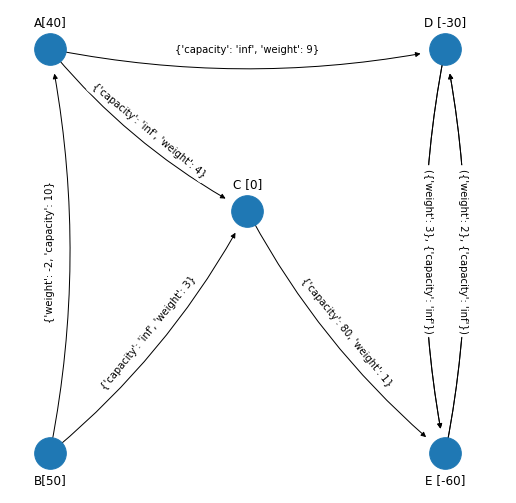

In [18]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

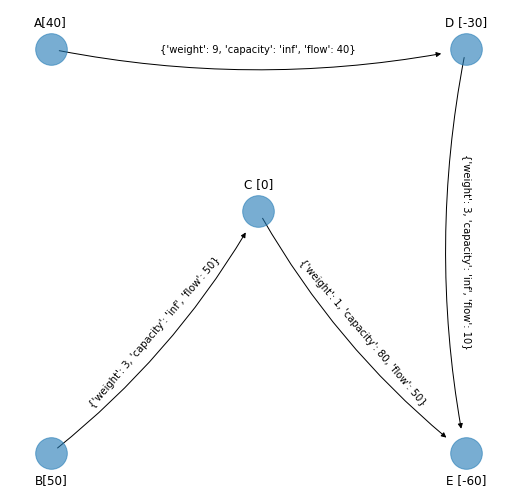

In [19]:
figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_spanning_tree_1,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_1,
           edge_labels_simplex_spanning_tree_1)

Identificamos los arcos no básicos que son los que no están en el spanning tree factible que se obtuvo. En el margen se muestra la red de referencia y el *spanning tree* factible, entonces los arcos no básicos son: $(B,A), (A,C), (E,D)$. Recuérdese que el arco $(B,A)$ se representa con la variable $y_{AB}$.

In [20]:
def add_edge_from_spanning_tree(G_full, G_spanning_tree, edge_to_be_added, edge_labels):
    G_cycle = G_spanning_tree.copy()
    G_cycle.add_edge(edge_to_be_added[0], edge_to_be_added[1])
    G_cycle.add_edge(edge_to_be_added[0], edge_to_be_added[1])
    G_cycle[edge_to_be_added[0]][edge_to_be_added[1]]["weight"] = G_full[edge_to_be_added[0]][edge_to_be_added[1]]["weight"]
    G_cycle[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"] = G_full[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"]
    G_cycle[edge_to_be_added[0]][edge_to_be_added[1]]["flow"] = ""
    edge_labels_new = copy.deepcopy(edge_labels)
    edge_labels_new[edge_to_be_added] = {}
    edge_labels_new[edge_to_be_added]["weight"] = G_cycle[edge_to_be_added[0]][edge_to_be_added[1]]["weight"]
    edge_labels_new[edge_to_be_added]["capacity"] = G_cycle[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"]
    edge_labels_new[edge_to_be_added]["flow"] = G_cycle[edge_to_be_added[0]][edge_to_be_added[1]]["flow"]
    return (G_cycle, edge_labels_new)

In [21]:
def plot_graph_with_cycle(figsize_tuple, G_to_plot,
                          nodes_position,
                          nodes_position_modified,
                          nodes_labels,
                          edge_labels,
                          edge_to_be_added):
  
    if figsize_tuple:
        plt.figure(figsize=figsize_tuple)
        
    nx.draw_networkx_edges(G_to_plot, pos=nodes_position, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                           edgelist=G_to_plot.edges())
    nx.draw_networkx_edges(G_to_plot, pos=nodes_and_pos, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                           edgelist=[edge_to_be_added],
                           width = 2,
                           style="dashed")    
    
    nx.draw_networkx_edge_labels(G_to_plot, pos=nodes_position,
                                 edge_labels=edge_labels,
                                 font_size=10)  
    nx.draw_networkx_labels(G_to_plot, pos=nodes_position_modified,
                            labels=nodes_labels)
    nx.draw_networkx_nodes(G_to_plot, pos=nodes_position, 
                           node_size=1000, alpha=0.6)
    plt.axis("off")
    plt.show()
def plot_graph_with_cycle_edges_trouble_to_visualize(figsize_tuple,
                                                     G_to_plot,
                                                     nodes_position,
                                                     nodes_position_modified,
                                                     nodes_labels,
                                                     edge_labels,
                                                     edge_to_be_added,
                                                     string_for_edges_trouble_to_visualize
                                                     ):
  
    if figsize_tuple:
        plt.figure(figsize=figsize_tuple)
        
    nx.draw_networkx_edges(G_to_plot, pos=nodes_position, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                           edgelist=G_to_plot.edges())
    nx.draw_networkx_edge_labels(G_to_plot, pos=nodes_position,
                                 edge_labels=edge_labels,
                                 font_size=10)    
    nx.draw_networkx_edges(G_to_plot, pos=nodes_and_pos, 
                           min_target_margin=25, connectionstyle="arc3, rad = 0.1",
                           edgelist=[edge_to_be_added],
                           width = 2,
                           style="dashed")    
    nx.draw_networkx_edge_labels(G_to_plot, pos=nodes_position, 
                                edge_labels=string_for_edges_trouble_to_visualize,
                                font_size=10) 
    nx.draw_networkx_labels(G_to_plot, pos=nodes_position_modified,
                            labels=nodes_labels)
    nx.draw_networkx_nodes(G_to_plot, pos=nodes_position, 
                           node_size=1000, alpha=0.6)
    plt.axis("off")
    plt.show()

**Arco $(B,A)$:**

In [22]:
edge_to_be_added_1 = ('B', 'A')

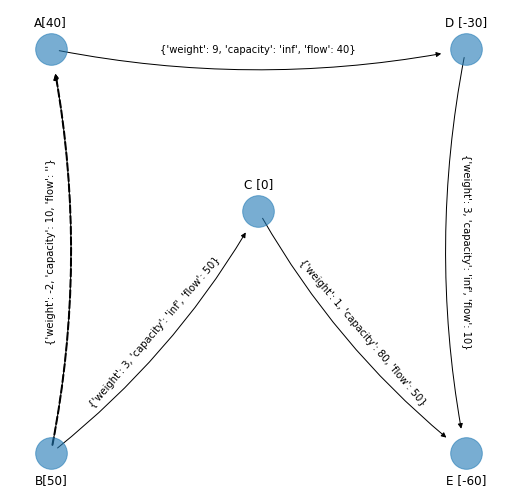

In [23]:
G_simplex_cycle_1, edge_labels_simplex_cycle_1 = add_edge_from_spanning_tree(G_simplex, G_simplex_spanning_tree_1, 
                                                                             edge_to_be_added_1,
                                                                             edge_labels_simplex_spanning_tree_1)
figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_1,
                      edge_labels_simplex_cycle_1,
                      edge_to_be_added_1)


```{margin}

Recordar la definición de {ref}`ciclo fundamental <CICLOFUND>`.

```

Entonces se forma un ciclo no dirigido. La orientación del ciclo se hereda de la dirección del arco añadido, en este caso en sentido de las manecillas del reloj:

In [24]:
cycle_1 = nx.find_cycle(G_simplex_cycle_1, source='B', orientation="ignore")

In [25]:
def fix_orientation(c_d, edge):
    if c_d[edge] == "reverse":
        for k,v in c_d.items():
            if c_d[k] == "forward":
                c_d[k] = "reverse"
            else:
                c_d[k] = "forward"

In [26]:
cycle_1_d = {(t[0], t[1]): t[2] for t in cycle_1}
fix_orientation(cycle_1_d, edge_to_be_added_1)
pprint.pprint(cycle_1_d)

{('A', 'D'): 'forward',
 ('B', 'A'): 'forward',
 ('B', 'C'): 'reverse',
 ('C', 'E'): 'reverse',
 ('D', 'E'): 'forward'}


Se calcula el costo unitario de incrementar el flujo por una unidad. Para los "forward" se suma y para los "reverse" se restan los costos:

In [27]:
edges_and_weights_simplex_cycle_1 = nx.get_edge_attributes(G_simplex_cycle_1, "weight")
pprint.pprint(edges_and_weights_simplex_cycle_1)

{('A', 'D'): 9, ('B', 'A'): -2, ('B', 'C'): 3, ('C', 'E'): 1, ('D', 'E'): 3}


In [28]:
def compute_cost_for_unit_increment(c_d, e_w_d):
    m_number_of_edges_simplex_cycle = len(e_w_d)
    weights_array = np.zeros(m_number_of_edges_simplex_cycle)
    for j,k in enumerate(c_d.keys()):
        if c_d[k] == "forward":
            weights_array[j] = e_w_d[k]
        else:
            weights_array[j] = -1*e_w_d[k]
    return weights_array

In [29]:
print(np.sum(compute_cost_for_unit_increment(cycle_1_d, 
                                             edges_and_weights_simplex_cycle_1))
     )

6.0


**Arco $(A,C)$:**

In [30]:
edge_to_be_added_2 = ('A', 'C')

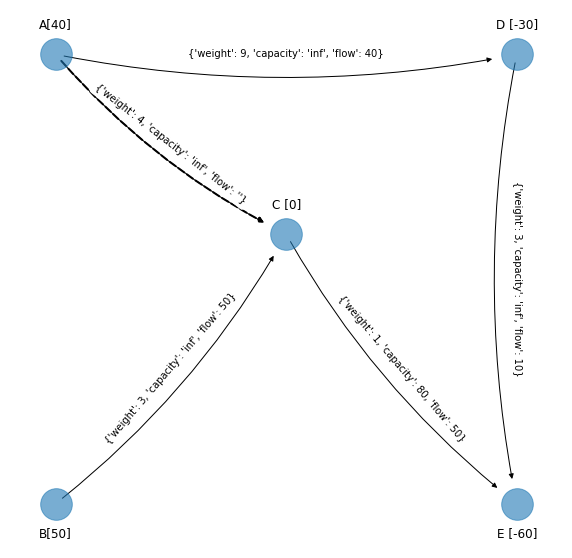

In [31]:
G_simplex_cycle_2, edge_labels_simplex_cycle_2 = add_edge_from_spanning_tree(G_simplex, G_simplex_spanning_tree_1, 
                                                                             edge_to_be_added_2,
                                                                             edge_labels_simplex_spanning_tree_1)

figsize_tuple = (10, 10)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_1,
                      edge_labels_simplex_cycle_2,
                      edge_to_be_added_2)


In [32]:
cycle_2 = nx.find_cycle(G_simplex_cycle_2, source='B', orientation="ignore")

In [33]:
cycle_2_d = {(t[0], t[1]): t[2] for t in cycle_2}
fix_orientation(cycle_2_d, edge_to_be_added_2)
pprint.pprint(cycle_2_d)

{('A', 'C'): 'forward',
 ('A', 'D'): 'reverse',
 ('C', 'E'): 'forward',
 ('D', 'E'): 'reverse'}


Se calcula el costo unitario de incrementar el flujo por una unidad. Para los "forward" se suma y para los "reverse" se restan los costos:

In [34]:
edges_and_weights_simplex_cycle_2 = nx.get_edge_attributes(G_simplex_cycle_2, "weight")
pprint.pprint(edges_and_weights_simplex_cycle_2)

{('A', 'C'): 4, ('A', 'D'): 9, ('B', 'C'): 3, ('C', 'E'): 1, ('D', 'E'): 3}


In [35]:
print(np.sum(compute_cost_for_unit_increment(cycle_2_d, 
                                             edges_and_weights_simplex_cycle_2))
     )

-7.0


**Arco $(E,D)$:**

In [36]:
edge_to_be_added_3 = ('E', 'D')

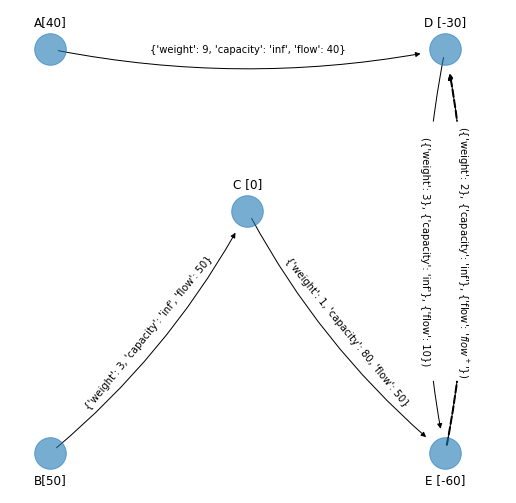

In [38]:
G_simplex_cycle_3, edge_labels_simplex_cycle_3 = add_edge_from_spanning_tree(G_simplex, G_simplex_spanning_tree_1, 
                                                                             edge_to_be_added_3,
                                                                             edge_labels_simplex_spanning_tree_1)

n1["flow"] = "$flow^+$"
n2["flow"] = G_simplex_spanning_tree_1['D']['E']["flow"]

stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]}, {"flow": n1["flow"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},{"flow": n2["flow"]})}'
string_for_edges_trouble_to_visualize = {('D', 'E'): ''.join([stri1, stri2, stri3])}

figsize_tuple = (9, 9)
plot_graph_with_cycle_edges_trouble_to_visualize(figsize_tuple,
                                                 G_simplex_cycle_3,
                                                 nodes_and_pos,
                                                 nodes_and_pos_modified,
                                                 node_labels_simplex_spanning_tree_1,
                                                 edge_labels_simplex_cycle_3,
                                                 edge_to_be_added_3,
                                                 string_for_edges_trouble_to_visualize
                                                 )

In [39]:
cycle_3 = nx.find_cycle(G_simplex_cycle_3, source='B', orientation="ignore")

In [40]:
cycle_3_d = {(t[0], t[1]): t[2] for t in cycle_3}
fix_orientation(cycle_3_d, edge_to_be_added_3)
pprint.pprint(cycle_3_d)

{('D', 'E'): 'forward', ('E', 'D'): 'forward'}


Se calcula el costo unitario de incrementar el flujo por una unidad. Para los "forward" se suma y para los "reverse" se restan los costos:

In [41]:
edges_and_weights_simplex_cycle_3 = nx.get_edge_attributes(G_simplex_cycle_3, "weight")
pprint.pprint(edges_and_weights_simplex_cycle_3)

{('A', 'D'): 9, ('B', 'C'): 3, ('C', 'E'): 1, ('D', 'E'): 3, ('E', 'D'): 2}


In [42]:
print(np.sum(compute_cost_for_unit_increment(cycle_3_d, 
                                             edges_and_weights_simplex_cycle_3))
     )

5.0


En resúmen:

|Arco | Costo por incrementar una unidad del arco|
|:---:|:---:|
|(B,A)|6|
|(A,C)|-7|
|(E,D)|5|

Entonces el arco no básico que tiene la tasa más alta de mejoramiento de $f_o$ es $(A,C)$.

```{admonition} Comentario

Si no hay arcos no básicos que mejoren $f_o$ entonces la solución actual es óptima.

```

In [43]:
print(edge_to_be_added_2)

('A', 'C')


### Revisión de cuál arco básico es sustituido

Tomando la red que resultó de añadir el arco no básico al *spanning tree* factible, se determina incrementando el flujo de la red lo más posible hasta que uno de los arcos básicos llege a su cota inferior o superior. Denotemos al incremento como la cantidad $\text{flow}^+$ y para los arcos que son "forward" se suma tal cantidad al flujo actual y para los que son "reverse" se resta:

In [44]:
def edge_label_change_for_basic_edge_subs(c_d, edge_labels_reference, edge_to_be_added):
    edge_labels_with_flow_change = {}
    edge_labels_with_flow_change = copy.deepcopy(edge_labels_reference)
    for e in edge_labels_with_flow_change.keys():
        if e in c_d.keys():
            if e != edge_to_be_added:
                if c_d[e] == "forward":
                    edge_labels_with_flow_change[e]["flow"] = "".join([str(edge_labels_with_flow_change[e]["flow"]),
                                                                           "+ $flow^+$"])
                    edge_labels_with_flow_change[e]["bool"] = "+" 
                else:
                    edge_labels_with_flow_change[e]["flow"] = "".join([str(edge_labels_with_flow_change[e]["flow"]),
                                                                           "- $flow^+$"])
                    edge_labels_with_flow_change[e]["bool"] = "-"
            else:
                edge_labels_with_flow_change[e]["flow"] = "".join([str(edge_labels_with_flow_change[e]["flow"]),
                                                                       "$flow^+$"]) 
        else:
            edge_labels_with_flow_change[e]["bool"] = 0 
    return edge_labels_with_flow_change

In [45]:
edge_labels_simplex_cycle_2_with_flow_change = edge_label_change_for_basic_edge_subs(cycle_2_d, 
                                                                                     edge_labels_simplex_cycle_2, 
                                                                                     edge_to_be_added_2)
pprint.pprint(edge_labels_simplex_cycle_2_with_flow_change)

{('A', 'C'): {'capacity': 'inf', 'flow': '$flow^+$', 'weight': 4},
 ('A', 'D'): {'bool': '-',
              'capacity': 'inf',
              'flow': '40- $flow^+$',
              'weight': 9},
 ('B', 'C'): {'bool': 0, 'capacity': 'inf', 'flow': 50, 'weight': 3},
 ('C', 'E'): {'bool': '+', 'capacity': 80, 'flow': '50+ $flow^+$', 'weight': 1},
 ('D', 'E'): {'bool': '-',
              'capacity': 'inf',
              'flow': '10- $flow^+$',
              'weight': 3}}


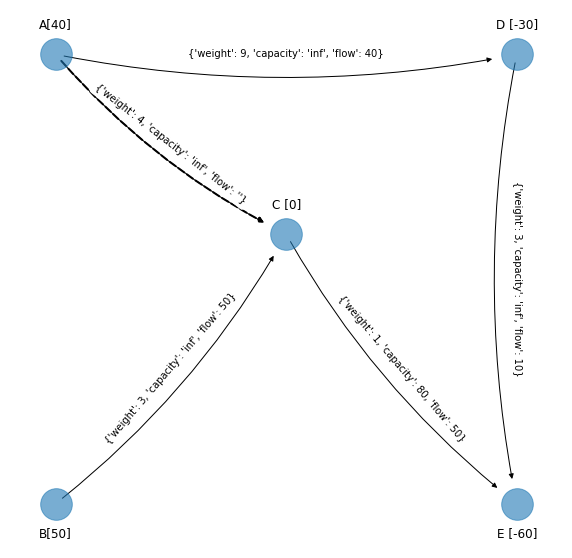

In [48]:
figsize_tuple = (10, 10)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_1,
                      edge_labels_simplex_cycle_2,
                      edge_to_be_added_2)

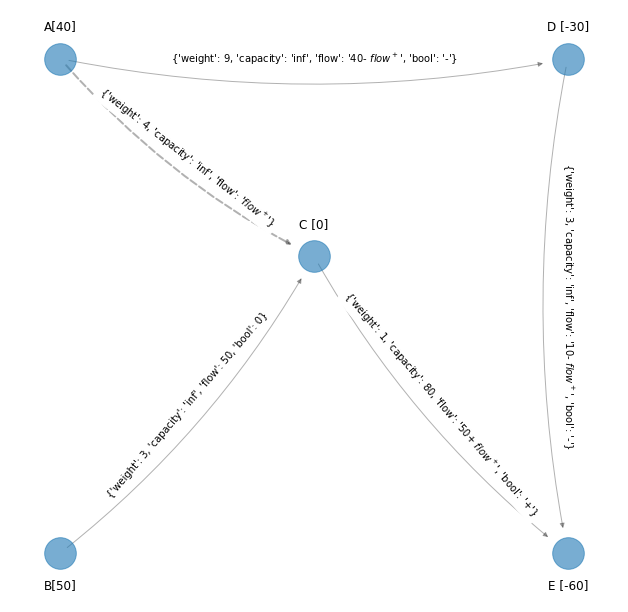

In [124]:
figsize_tuple = (11, 11)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_1,
                      edge_labels_simplex_cycle_2_with_flow_change,
                      edge_to_be_added_2)

Como se debe cumplir la no negatividad y la cota superior, para los arcos en los que se aumenta y tienen cota superior se tiene

$$x_{CE} = 50 + \text{flow}^+ \leq 80$$

y para los arcos en los que se disminuye:

$$\begin{eqnarray}
x_{AD} = 40 - \text{flow}^+ &\geq& 0 \nonumber \\
x_{DE} = 10 - \text{flow}^+ &\geq& 0
\end{eqnarray}
$$

Por lo que:

$$\begin{eqnarray}
\text{flow}^+ &\leq& 30 \quad \text{que se obtuvo del arco } x_{CE} \nonumber \\
\text{flow}^+ &\leq& 40 \quad \text{que se obtuvo del arco } x_{AD} \nonumber \\
\text{flow}^+ &\leq& 10 \quad \text{que se obtuvo del arco } x_{DE} \nonumber
\end{eqnarray}
$$

El mínimo es $10$, entonces $\text{flow}^+ = 10$ y el arco básico que será sustituido es $(D,E)$. Como su flujo llega a cero no lo guardamos en la red `G_simplex_edges_upper_bounds`.

El nuevo *spanning tree* factible es:

In [51]:
flow_plus = 10

In [52]:
edge_to_remove_spanning_tree_2 = ('D', 'E')
edge_to_add_spanning_tree_2 = edge_to_be_added_2

In [53]:
print(edge_to_add_spanning_tree_2)

('A', 'C')


In [54]:
def get_spanning_tree_from_spanning_tree_reference(G_spanning_tree_reference, 
                                                   edge_to_remove,
                                                   edge_to_add):
    G_spanning_tree = G_spanning_tree_reference.copy()
    G_spanning_tree.remove_edge(edge_to_remove[0], edge_to_remove[1])
    G_spanning_tree.add_edge(edge_to_add[0], edge_to_add[1])

    return G_spanning_tree
def increase_flow_from_edge_labels_with_flow_change(G_reference,
                                                    G_spanning_tree_reference,
                                                    G_spanning_tree,
                                                    edge_to_add,
                                                    edge_labels_with_flow_change):
    
    list_edges_spanning_tree = G_spanning_tree.edges()
    edge_labels_spanning_tree = {}
    
    for e in list_edges_spanning_tree:
        if e != edge_to_add:
            edge_labels_spanning_tree[e] = copy.deepcopy(G_spanning_tree_reference[e[0]][e[1]])
            if edge_labels_with_flow_change[e]["bool"] == "+":
                edge_labels_spanning_tree[e]["flow"] = edge_labels_spanning_tree[e]["flow"] + flow_plus
            else:
                if edge_labels_with_flow_change[e]["bool"] == "-":
                    edge_labels_spanning_tree[e]["flow"] = edge_labels_spanning_tree[e]["flow"] - flow_plus
                else:
                    edge_labels_spanning_tree[e]["flow"] = edge_labels_spanning_tree[e]["flow"]
    
        if e == edge_to_add:
            edge_labels_spanning_tree[e] = {}
            edge_labels_spanning_tree[e]["weight"] = G_reference[edge_to_add[0]][edge_to_add[1]]["weight"]
            edge_labels_spanning_tree[e]["capacity"] = G_reference[edge_to_add[0]][edge_to_add[1]]["capacity"]
            edge_labels_spanning_tree[e]["flow"] = flow_plus 
            
    
    for e in G_spanning_tree.edges():
        G_spanning_tree[e[0]][e[1]]["flow"] = edge_labels_spanning_tree[e]["flow"]
        if e==edge_to_add:
            G_spanning_tree[e[0]][e[1]]["weight"] = edge_labels_spanning_tree[e]["weight"]
            G_spanning_tree[e[0]][e[1]]["capacity"] = edge_labels_spanning_tree[e]["capacity"]    
    
    return (G_spanning_tree, edge_labels_spanning_tree)

```{margin}

Se incrementa el flujo de la red únicamente en el ciclo por $\text{flow}^+ = 10$ y se elimina el arco $(D,E)$.

```

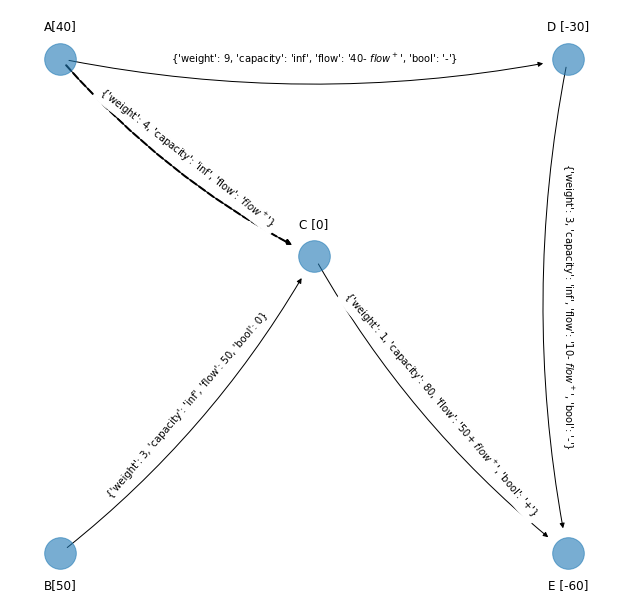

In [56]:
figsize_tuple = (11, 11)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_1,
                      edge_labels_simplex_cycle_2_with_flow_change,
                      edge_to_be_added_2)

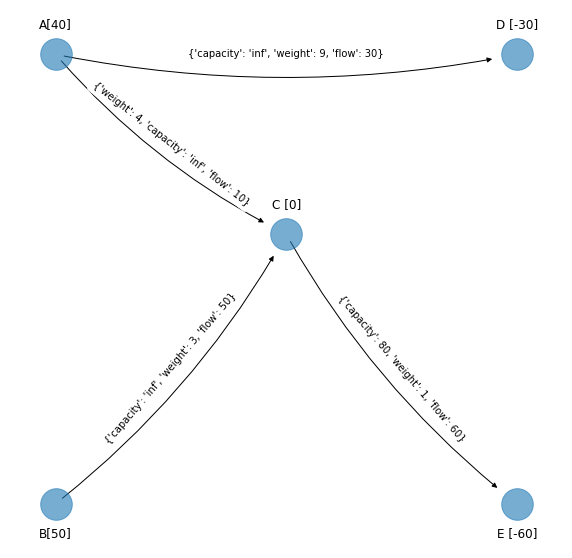

In [59]:
G_simplex_spanning_tree_2 = get_spanning_tree_from_spanning_tree_reference(G_simplex_spanning_tree_1, 
                                                                           edge_to_remove_spanning_tree_2,
                                                                           edge_to_add_spanning_tree_2)

G_simplex_spanning_tree_2, edge_labels_simplex_spanning_tree_2 = increase_flow_from_edge_labels_with_flow_change(G_simplex,
                                                                                                                 G_simplex_spanning_tree_1,
                                                                                                                 G_simplex_spanning_tree_2,
                                                                                                                 edge_to_add_spanning_tree_2,
                                                                                                                 edge_labels_simplex_cycle_2_with_flow_change)
node_labels_simplex_spanning_tree_2 = nx.get_node_attributes(G_simplex_spanning_tree_2, 
                                                            "node_and_demand")
figsize_tuple = (10, 10)
plot_graph(figsize_tuple, G_simplex_spanning_tree_2,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_2,
           edge_labels_simplex_spanning_tree_2)

## Iteración siguiente

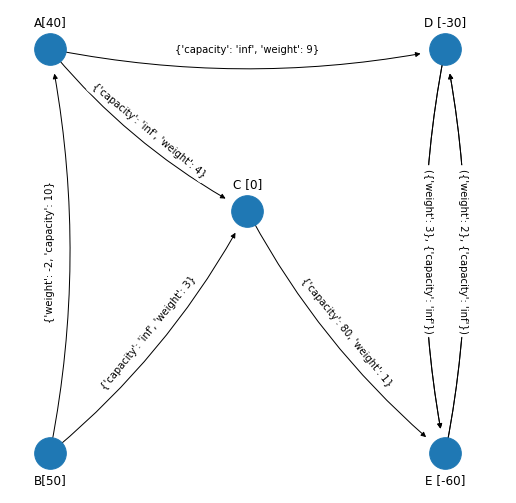

In [61]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

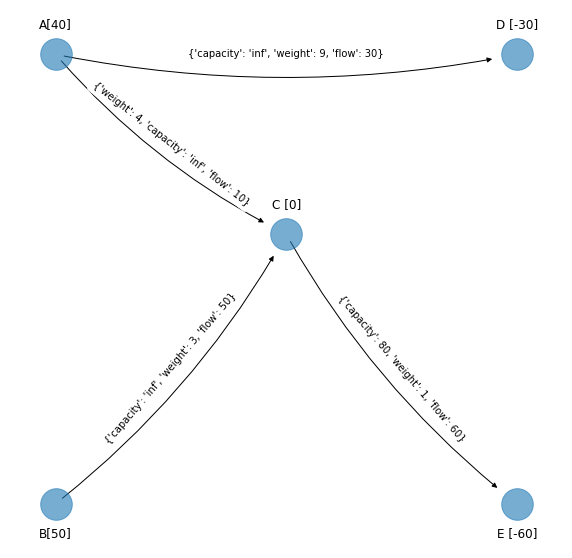

In [65]:
figsize_tuple = (10, 10)
plot_graph(figsize_tuple, G_simplex_spanning_tree_2,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_2,
           edge_labels_simplex_spanning_tree_2)

Identificamos los arcos no básicos que son los que no están en el *spanning tree* factible que se obtuvo al final de la iteración anterior. En el margen se muestra la red de referencia y el *spanning tree* factible, entonces los arcos no básicos son $(B, A), (D, E), (E,D)$.

### Revisión de cuál arco no básico sustituye a un arco básico

**Arco $(B, A)$**:

In [66]:
edge_to_be_added_1 = ('B', 'A')

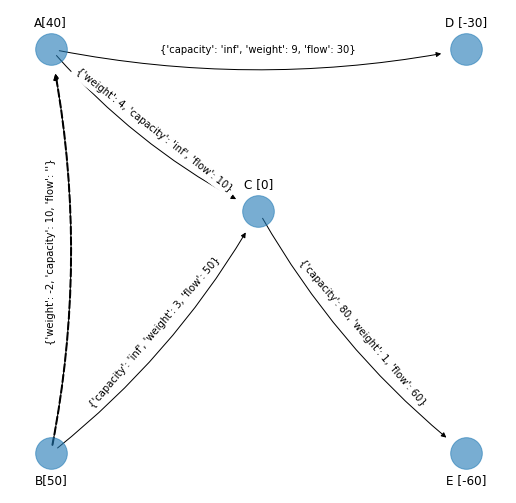

In [68]:
G_simplex_cycle_1, edge_labels_simplex_cycle_1 = add_edge_from_spanning_tree(G_simplex, G_simplex_spanning_tree_2, 
                                                                             edge_to_be_added_1,
                                                                             edge_labels_simplex_spanning_tree_2)

figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_2,
                      edge_labels_simplex_cycle_1,
                      edge_to_be_added_1)

```{margin}

Recordar la definición de {ref}`ciclo fundamental <CICLOFUND>`.

```

Entonces se forma un ciclo no dirigido. Se calcula el costo unitario de incrementar el flujo por una unidad. Para los arcos "forward" se suma y para los "reverse" se restan los costos:

In [69]:
cycle_1 = nx.find_cycle(G_simplex_cycle_1, source='B', orientation="ignore")
cycle_1_d = {(t[0], t[1]): t[2] for t in cycle_1}
fix_orientation(cycle_1_d, edge_to_be_added_1)

edges_and_weights_simplex_cycle_1 = nx.get_edge_attributes(G_simplex_cycle_1, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_1_d, 
                                             edges_and_weights_simplex_cycle_1))
     )

-1.0


**Arco $(D, E)$**:

In [70]:
edge_to_be_added_2 = ('D', 'E')

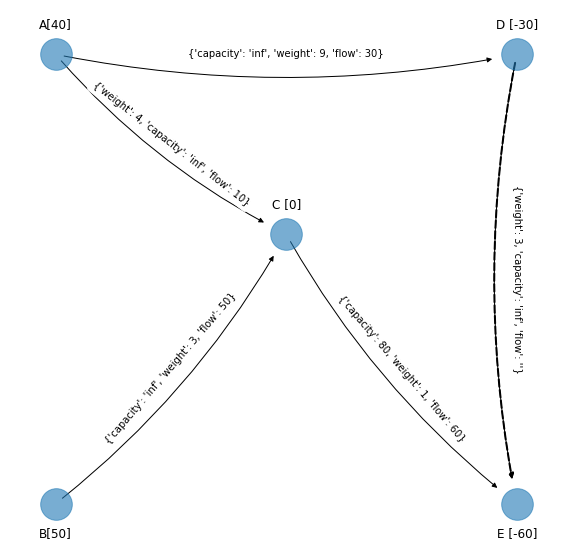

In [73]:
G_simplex_cycle_2, edge_labels_simplex_cycle_2 = add_edge_from_spanning_tree(G_simplex, G_simplex_spanning_tree_2, 
                                                                             edge_to_be_added_2,
                                                                             edge_labels_simplex_spanning_tree_2)

figsize_tuple = (10, 10)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_2,
                      edge_labels_simplex_cycle_2,
                      edge_to_be_added_2)

Entonces se forma un ciclo no dirigido. Se calcula el costo unitario de incrementar el flujo por una unidad. Para los arcos "forward" se suma y para los "reverse" se restan los costos:

In [74]:
cycle_2 = nx.find_cycle(G_simplex_cycle_2, source='B', orientation="ignore")
cycle_2_d = {(t[0], t[1]): t[2] for t in cycle_2}
fix_orientation(cycle_2_d, edge_to_be_added_2)

edges_and_weights_simplex_cycle_2 = nx.get_edge_attributes(G_simplex_cycle_2, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_2_d, 
                                             edges_and_weights_simplex_cycle_2))
     )

7.0


**Arco $(E, D)$**:

In [75]:
edge_to_be_added_3 = ('E', 'D')

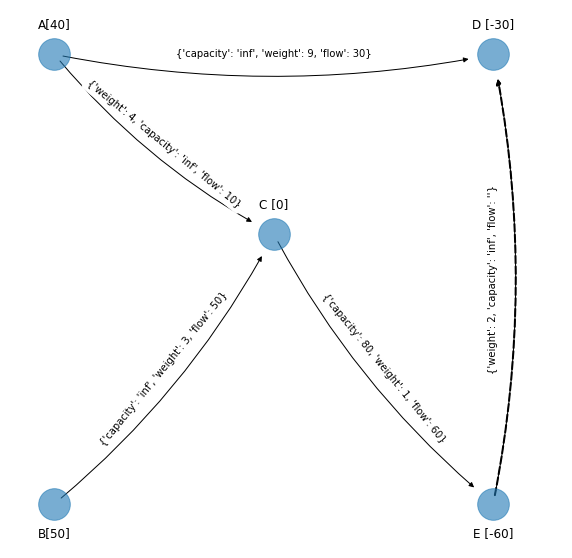

In [77]:
G_simplex_cycle_3, edge_labels_simplex_cycle_3 = add_edge_from_spanning_tree(G_simplex, G_simplex_spanning_tree_2, 
                                                                             edge_to_be_added_3,
                                                                             edge_labels_simplex_spanning_tree_2)

figsize_tuple = (10, 10)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_3,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_2,
                      edge_labels_simplex_cycle_3,
                      edge_to_be_added_3)

Entonces se forma un ciclo no dirigido. Se calcula el costo unitario de incrementar el flujo por una unidad. Para los arcos "forward" se suma y para los "reverse" se restan los costos:

In [78]:
cycle_3 = nx.find_cycle(G_simplex_cycle_3, source='B', orientation="ignore")
cycle_3_d = {(t[0], t[1]): t[2] for t in cycle_3}
fix_orientation(cycle_3_d, edge_to_be_added_3)

edges_and_weights_simplex_cycle_3 = nx.get_edge_attributes(G_simplex_cycle_3, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_3_d, 
                                             edges_and_weights_simplex_cycle_3))
     )

-2.0


En resúmen:

|Arco | Costo por incrementar una unidad del arco|
|:---:|:---:|
|(B,A)|-1|
|(D,E)|7|
|(E,D)|-2|

Entonces el arco no básico que tiene la tasa más alta de mejoramiento de $f_o$ es $(E,D)$.

```{margin}

Si no hay arcos no básicos que mejoren $f_o$ entonces la solución actual es óptima.

```

In [79]:
print(edge_to_be_added_3)

('E', 'D')


### Revisión de cuál arco básico es sustituido

Tomando la red que resultó de añadir el arco no básico al *spanning tree* factible, se determina incrementando el flujo de la red lo más posible hasta que uno de los arcos básicos llege a su cota inferior o superior. 
Se denota como la cantidad $flow^+$ y para los arcos que son "forward" se suma tal cantidad al flujo actual y para los que son "reverse" se resta:

In [80]:
edge_labels_simplex_cycle_3_with_flow_change = edge_label_change_for_basic_edge_subs(cycle_3_d, 
                                                                                     edge_labels_simplex_cycle_3, 
                                                                                     edge_to_be_added_3)
pprint.pprint(edge_labels_simplex_cycle_3_with_flow_change)

{('A', 'C'): {'bool': '+',
              'capacity': 'inf',
              'flow': '10+ $flow^+$',
              'weight': 4},
 ('A', 'D'): {'bool': '-',
              'capacity': 'inf',
              'flow': '30- $flow^+$',
              'weight': 9},
 ('B', 'C'): {'bool': 0, 'capacity': 'inf', 'flow': 50, 'weight': 3},
 ('C', 'E'): {'bool': '+', 'capacity': 80, 'flow': '60+ $flow^+$', 'weight': 1},
 ('E', 'D'): {'capacity': 'inf', 'flow': '$flow^+$', 'weight': 2}}


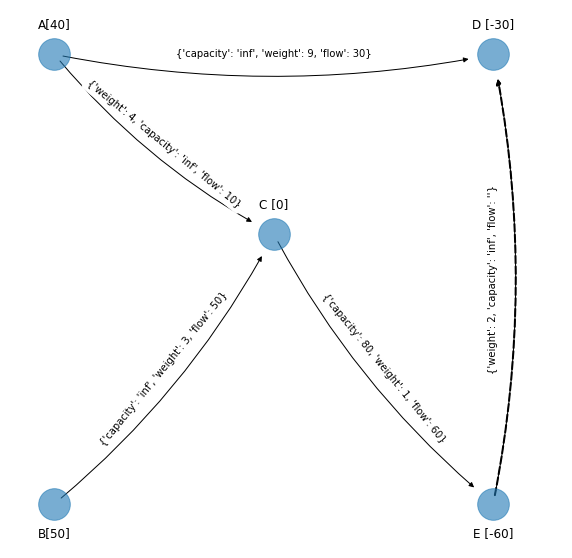

In [82]:
figsize_tuple = (10, 10)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_3,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_2,
                      edge_labels_simplex_cycle_3,
                      edge_to_be_added_3)

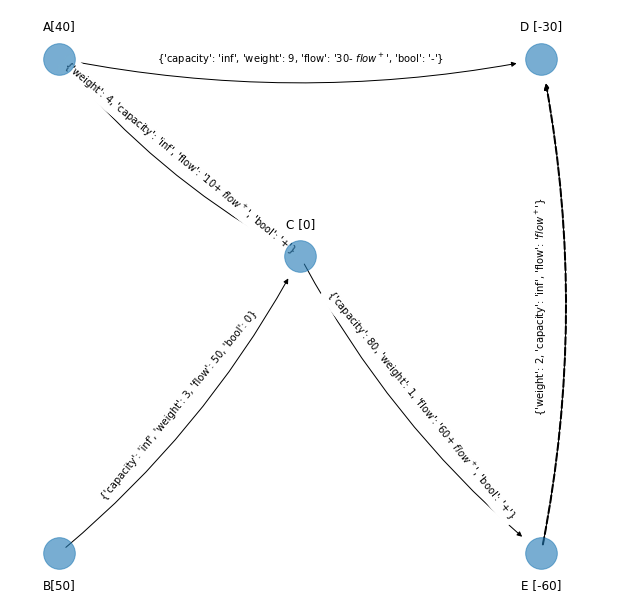

In [84]:
figsize_tuple = (11, 11)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_3,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_2,
                      edge_labels_simplex_cycle_3_with_flow_change,
                      edge_to_be_added_3)

Como se debe cumplir la no negatividad y la cota superior, para los arcos en los que se aumenta y tienen cota superior se tiene:

$$
x_{CE} = 60 + \text{flow}^+ \leq 80
$$

y para los arcos en los que se disminuye:

$$
x_{AD} = 30 - \text{flow}^+ \geq 0
$$

Por lo que:

$$
\begin{eqnarray}
\text{flow}^+ &\leq& 20 \quad \text{que se obtuvo del arco } x_{CE} \nonumber \\
\text{flow}^+ &\leq& 30 \quad \text{que se obtuvo del arco } x_{AD} \nonumber \\
\end{eqnarray}
$$

El mínimo es 20, entonces $\text{flow}^+=20$ y el arco básico que será sustituido es $(C,E)$.

### Técnica de la cota superior

Al modificar el flujo con $\text{flow}^+=20$ se tiene que el arco $(C,E)$ tiene un flujo igual a $80$ con lo que llegó a su capacidad máxima. Entonces se intercambia el arco $(C, E)$ por el arco $(E, C)$ con costo unitario igual al negativo de $(C, E)$, misma capacidad y con flujo igual igual $0$. Surge una nueva variable no básica $y_{CE} = 0$ y $x_{CE} = 80 - y_{CE}$. $b_E$ se le aumenta $80$ y $b_C$ se le resta $80$:


In [85]:
new_demand_E = G_simplex['C']['E']["capacity"] + nx.get_node_attributes(G_simplex, "demand")['E']

In [86]:
print(new_demand_E)

20


In [87]:
new_demand_C = nx.get_node_attributes(G_simplex, "demand")['C']- G_simplex['C']['E']["capacity"] 

In [88]:
print(new_demand_C)

-80


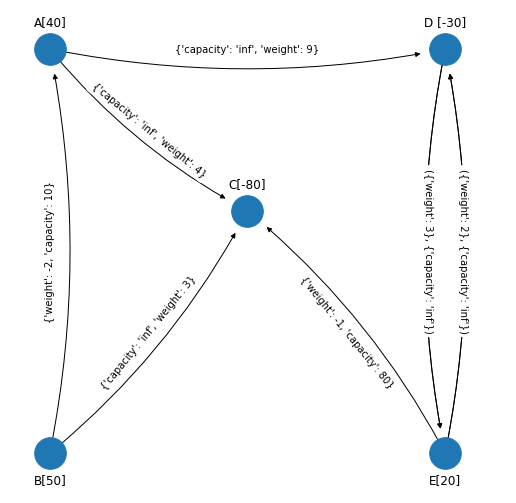

In [90]:
G_simplex2 = G_simplex.copy()
G_simplex2.remove_edge('C','E')
G_simplex2.add_edge('E','C')
G_simplex2['E']['C']["weight"] = -G_simplex['C']['E']["weight"]
G_simplex2['E']['C']["capacity"] = G_simplex['C']['E']["capacity"]

node_and_demand_E = "".join(['E', '[', str(new_demand_E),']'])
node_and_demand_C = "".join(['C', '[', str(new_demand_C),']'])

nx.set_node_attributes(G_simplex2, {'E': {"demand": new_demand_E,
                                         "node_and_demand": node_and_demand_E},
                                   'C': {"demand": new_demand_C,
                                         "node_and_demand": node_and_demand_C}
                                   })

node_labels_simplex2 = nx.get_node_attributes(G_simplex2, "node_and_demand")

figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex2, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex2,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

Para futura referencia el arco $(C,E)$ que alcanzó la cota superior lo guardamos en la red `G_simplex_edges_upper_bounds`.

In [91]:
edge_to_be_added_in_graph_of_upper_bounds = ('C','E')

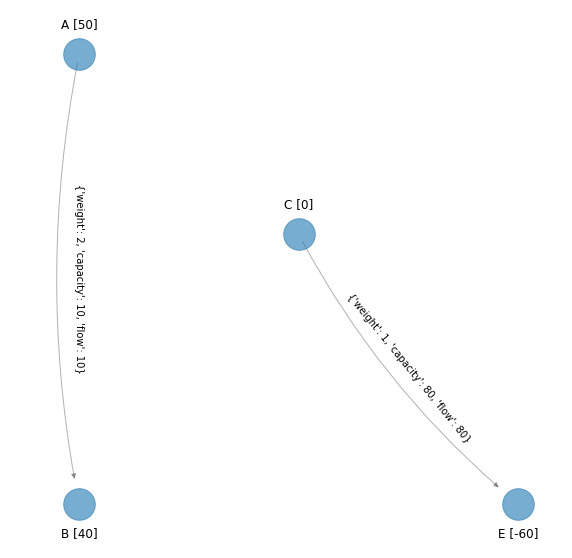

In [152]:
G_simplex_edges_upper_bounds.add_node(edge_to_be_added_in_graph_of_upper_bounds[0])
G_simplex_edges_upper_bounds.add_node(edge_to_be_added_in_graph_of_upper_bounds[1])

G_simplex_edges_upper_bounds = add_edge_to_graph_of_upper_bounds(G_min_cost_flow,
                                                                 G_simplex_edges_upper_bounds,
                                                                 edge_to_be_added_in_graph_of_upper_bounds,
                                                                 edge_labels_simplex_upper_bounds)

node_labels_simplex_upper_bounds = nx.get_node_attributes(G_simplex_edges_upper_bounds, "node_and_demand")

figsize_tuple = (10, 10)
plot_graph(figsize_tuple, G_simplex_edges_upper_bounds,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_upper_bounds,
           edge_labels_simplex_upper_bounds)

El nuevo *spanning tree* factible es:

In [93]:
flow_plus = 20

In [94]:
edge_to_remove_spanning_tree_3 = ('C', 'E')
edge_to_add_spanning_tree_3 = edge_to_be_added_3

In [95]:
print(edge_to_add_spanning_tree_3)

('E', 'D')


```{margin}

Se incrementa el flujo de la red únicamente en el ciclo por $\text{flow}^+ = 20$ y se elimina el arco $(C,E)$.

```

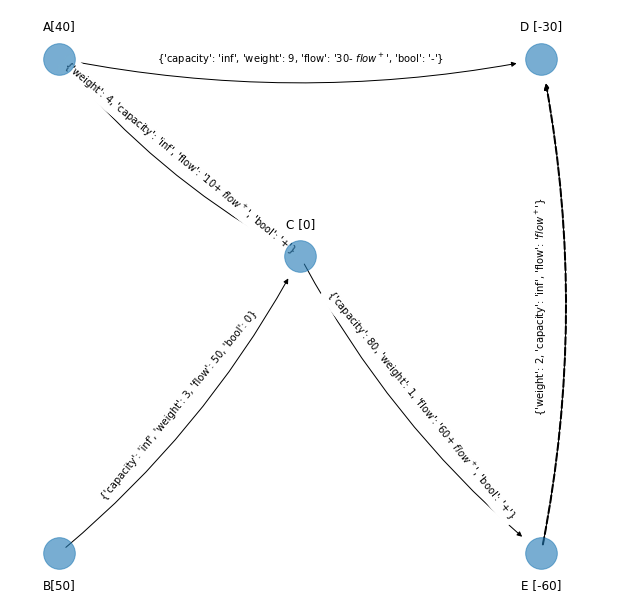

In [97]:
figsize_tuple = (11, 11)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_3,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_2,
                      edge_labels_simplex_cycle_3_with_flow_change,
                      edge_to_be_added_3)

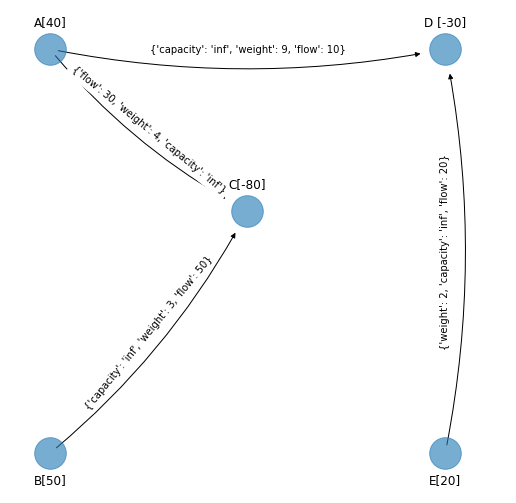

In [100]:
G_simplex_spanning_tree_3 = get_spanning_tree_from_spanning_tree_reference(G_simplex_spanning_tree_2, 
                                                                           edge_to_remove_spanning_tree_3,
                                                                           edge_to_add_spanning_tree_3)

G_simplex_spanning_tree_3, edge_labels_simplex_spanning_tree_3 = increase_flow_from_edge_labels_with_flow_change(G_simplex2,
                                                                                                                 G_simplex_spanning_tree_2,
                                                                                                                 G_simplex_spanning_tree_3,
                                                                                                                 edge_to_add_spanning_tree_3,
                                                                                                                 edge_labels_simplex_cycle_3_with_flow_change)
#update demands after upper bound technique
nx.set_node_attributes(G_simplex_spanning_tree_3, {'C': {"demand": new_demand_C,
                                                         "node_and_demand": node_and_demand_C}})
nx.set_node_attributes(G_simplex_spanning_tree_3, {'E': {"demand": new_demand_E,
                                                         "node_and_demand": node_and_demand_E}})
node_labels_simplex_spanning_tree_3 = nx.get_node_attributes(G_simplex_spanning_tree_3, 
                                                            "node_and_demand")
figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_spanning_tree_3,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_3,
           edge_labels_simplex_spanning_tree_3)

## Iteración siguiente

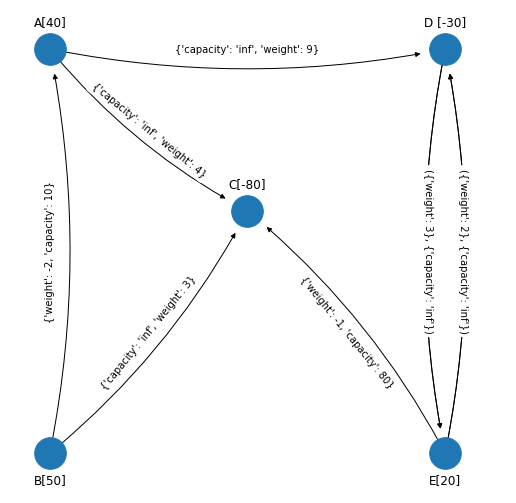

In [102]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex2, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex2,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

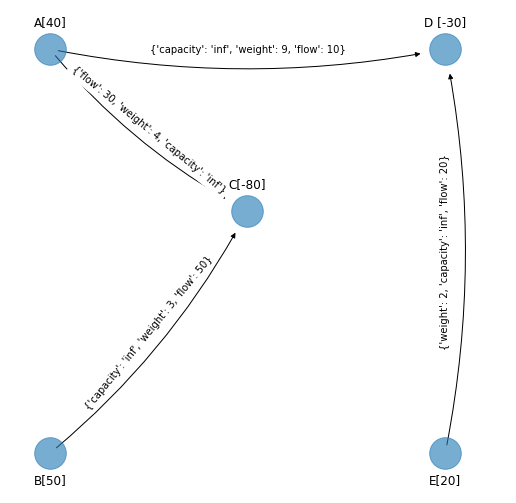

In [104]:
figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_spanning_tree_3,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_3,
           edge_labels_simplex_spanning_tree_3)

Identificamos los arcos no básicos que son los que no están en el spanning tree factible que se obtuvo al final de la iteración anterior. En el margen se muestra la red y el *spanning tree* factible, entonces los arcos no básicos son $(B,A), (E,C), (D,E)$.

### Revisión de cuál arco no básico sustituye a un arco básico

**Arco $(B, A)$**

In [105]:
edge_to_be_added_1 = ('B', 'A')

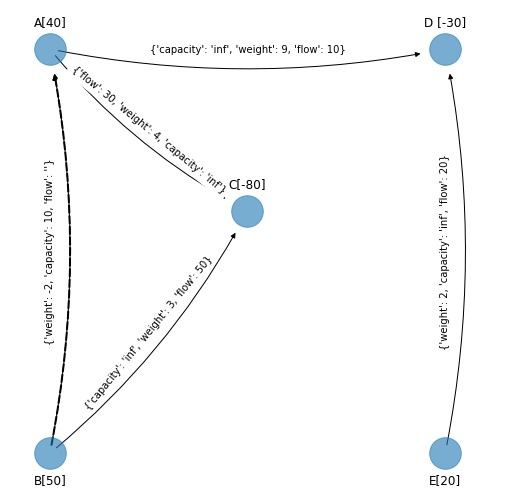

In [107]:
G_simplex_cycle_1, edge_labels_simplex_cycle_1 = add_edge_from_spanning_tree(G_simplex2, G_simplex_spanning_tree_3, 
                                                                             edge_to_be_added_1,
                                                                             edge_labels_simplex_spanning_tree_3)


figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_3,
                      edge_labels_simplex_cycle_1,
                      edge_to_be_added_1)

In [108]:
cycle_1 = nx.find_cycle(G_simplex_cycle_1, source='B', orientation="ignore")
cycle_1_d = {(t[0], t[1]): t[2] for t in cycle_1}
fix_orientation(cycle_1_d, edge_to_be_added_1)

edges_and_weights_simplex_cycle_1 = nx.get_edge_attributes(G_simplex_cycle_1, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_1_d, 
                                             edges_and_weights_simplex_cycle_1))
     )

-1.0


**Arco $(E, C)$**

In [109]:
edge_to_be_added_2 = ('E', 'C')

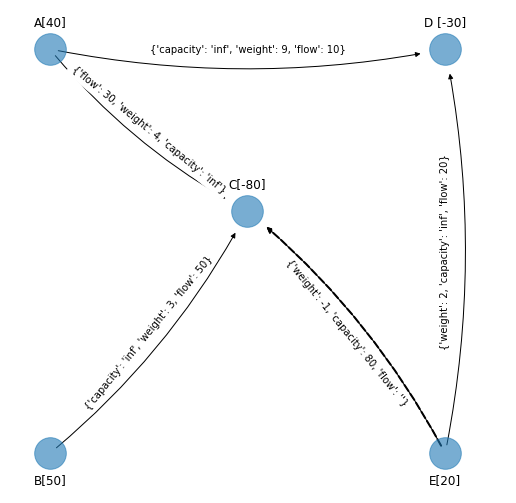

In [111]:
G_simplex_cycle_2, edge_labels_simplex_cycle_2 = add_edge_from_spanning_tree(G_simplex2, G_simplex_spanning_tree_3, 
                                                                             edge_to_be_added_2,
                                                                             edge_labels_simplex_spanning_tree_3)

figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_3,
                      edge_labels_simplex_cycle_2,
                      edge_to_be_added_2)

In [112]:
cycle_2 = nx.find_cycle(G_simplex_cycle_2, source='B', orientation="ignore")
cycle_2_d = {(t[0], t[1]): t[2] for t in cycle_2}
fix_orientation(cycle_2_d, edge_to_be_added_2)

edges_and_weights_simplex_cycle_2 = nx.get_edge_attributes(G_simplex_cycle_2, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_2_d, 
                                             edges_and_weights_simplex_cycle_2))
     )

2.0


**Arco $(D, E)$**

In [113]:
edge_to_be_added_3 = ('D', 'E')

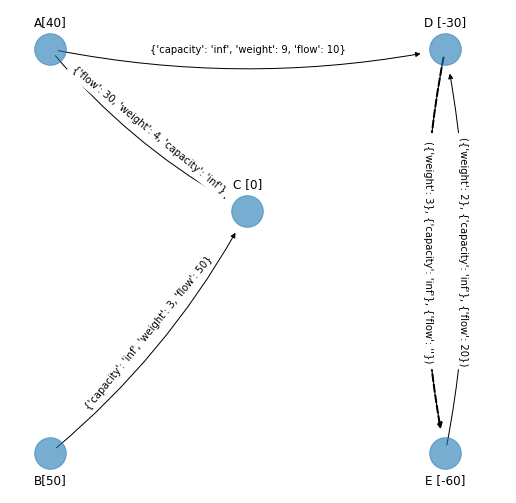

In [115]:
G_simplex_cycle_3, edge_labels_simplex_cycle_3 = add_edge_from_spanning_tree(G_simplex2, G_simplex_spanning_tree_3, 
                                                                             edge_to_be_added_3,
                                                                             edge_labels_simplex_spanning_tree_3)


n1["flow"] = G_simplex_spanning_tree_3['E']['D']["flow"]
n2["flow"] = ""


stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]}, {"flow": n1["flow"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},{"flow": n2["flow"]})}'
string_for_edges_trouble_to_visualize = {('D', 'E'): ''.join([stri1, stri2, stri3])}

figsize_tuple = (9, 9)
plot_graph_with_cycle_edges_trouble_to_visualize(figsize_tuple,
                                                 G_simplex_cycle_3,
                                                 nodes_and_pos,
                                                 nodes_and_pos_modified,
                                                 node_labels_simplex_spanning_tree_3,
                                                 edge_labels_simplex_cycle_3,
                                                 edge_to_be_added_3,
                                                 string_for_edges_trouble_to_visualize
                                                 )

In [116]:
cycle_3 = nx.find_cycle(G_simplex_cycle_3, source='B', orientation="ignore")
cycle_3_d = {(t[0], t[1]): t[2] for t in cycle_3}
fix_orientation(cycle_3_d, edge_to_be_added_3)

edges_and_weights_simplex_cycle_3 = nx.get_edge_attributes(G_simplex_cycle_3, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_3_d, 
                                             edges_and_weights_simplex_cycle_3))
     )

5.0


En resúmen:

|Arco | Costo por incrementar una unidad del arco|
|:---:|:---:|
|(B,A)|-1|
|(E,C)|2|
|(D,E)|5|

Entonces el arco no básico que tiene la tasa más alta de mejoramiento de $f_o$ es $(B,A)$.

```{margin}

Si no hay arcos no básicos que mejoren $f_o$ entonces la solución actual es óptima.

```

In [117]:
print(edge_to_be_added_1)

('B', 'A')


### Revisión de cuál arco básico es sustituido

Se denota como la cantidad $\text{flow}^+$ y para los arcos que son "forward" se suma tal cantidad al flujo actual y para los que son "reverse" se resta:

In [118]:
edge_labels_simplex_cycle_1_with_flow_change = edge_label_change_for_basic_edge_subs(cycle_1_d, 
                                                                                     edge_labels_simplex_cycle_1,
                                                                                     edge_to_be_added_1)
pprint.pprint(edge_labels_simplex_cycle_1_with_flow_change)

{('A', 'C'): {'bool': '+',
              'capacity': 'inf',
              'flow': '30+ $flow^+$',
              'weight': 4},
 ('A', 'D'): {'bool': 0, 'capacity': 'inf', 'flow': 10, 'weight': 9},
 ('B', 'A'): {'capacity': 10, 'flow': '$flow^+$', 'weight': -2},
 ('B', 'C'): {'bool': '-',
              'capacity': 'inf',
              'flow': '50- $flow^+$',
              'weight': 3},
 ('E', 'D'): {'bool': 0, 'capacity': 'inf', 'flow': 20, 'weight': 2}}


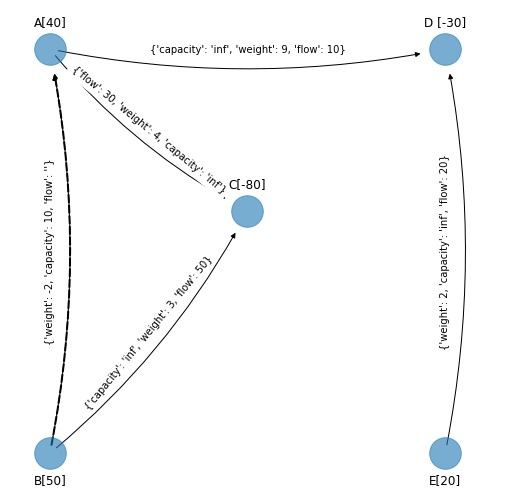

In [120]:
figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_3,
                      edge_labels_simplex_cycle_1,
                      edge_to_be_added_1)

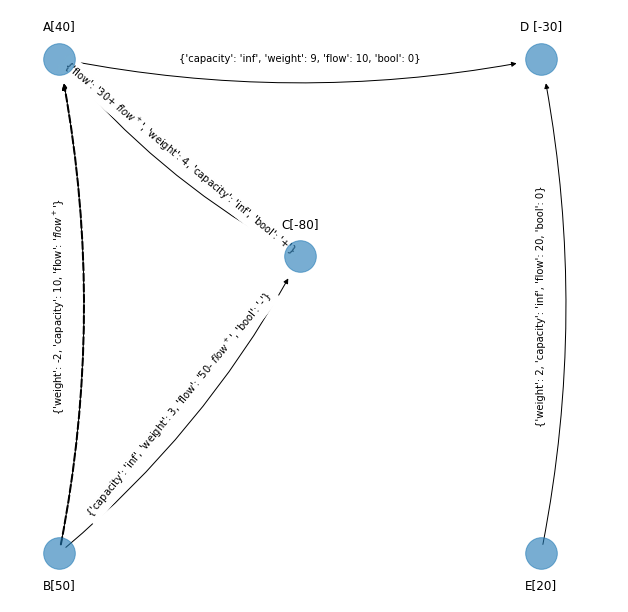

In [122]:
figsize_tuple = (11, 11)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_3,
                      edge_labels_simplex_cycle_1_with_flow_change,
                      edge_to_be_added_1)

Como se debe cumplir la no negatividad y la cota superior, para los arcos en los que se aumenta y tienen cota superior se tiene:

$$y_{AB} = \text{flow}^+ \leq 10$$

y para los arcos en los que se disminuye:

$$x_{BC} = 50 - \text{flow}^+ \geq 0$$

Por lo que:

$$
\begin{eqnarray}
\text{flow}^+ \leq 10 \quad \text{que se obtuvo del arco } y_{AB} \nonumber \\
\text{flow}^+ \leq 50 \quad \text{que se obtuvo del arco } x_{BC} 
\end{eqnarray}
$$

El mínimo es $10$, entonces $\text{flow}^+=10$ y el arco que será sustituido es $(B, A)$.

### Técnica de la cota superior

Al modificar el flujo con $\text{flow}^+=10$ se tiene que el arco $(B,A)$ tiene un flujo igual a $10$ con lo que llegó a su capacidad máxima. Entonces se intercambia el arco $(B,A)$ por el arco $(A,B)$ con costo unitario igual al negativo de $(B,A)$, misma capacidad y con flujo igual igual 0. Las asignaciones en las variables son $y_{AB}=10$ y $x_{AB} = 10 - y_{AB} = 10 - 10 = 0$. $b_A$ se le aumenta $10$ y $b_B$ se le resta $10$. 

In [123]:
new_demand_A = G_simplex2['B']['A']["capacity"] + nx.get_node_attributes(G_simplex2, "demand")['A']

In [124]:
print(new_demand_A)

50


In [125]:
new_demand_B = nx.get_node_attributes(G_simplex2, "demand")['B']- G_simplex['B']['A']["capacity"] 

In [126]:
print(new_demand_B)

40


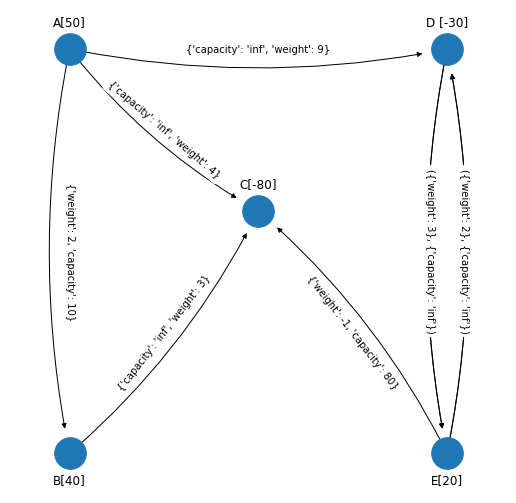

In [128]:
G_simplex3 = G_simplex2.copy()
G_simplex3.remove_edge('B','A')
G_simplex3.add_edge('A','B')
G_simplex3['A']['B']["weight"] = -G_simplex2['B']['A']["weight"]
G_simplex3['A']['B']["capacity"] = G_simplex2['B']['A']["capacity"]

node_and_demand_A = "".join(['A', '[', str(new_demand_A),']'])
node_and_demand_B = "".join(['B', '[', str(new_demand_B),']'])

nx.set_node_attributes(G_simplex3, {'A': {"demand": new_demand_A,
                                         "node_and_demand": node_and_demand_A},
                                    'B': {"demand": new_demand_B,
                                         "node_and_demand": node_and_demand_B}
                                   })

node_labels_simplex3 = nx.get_node_attributes(G_simplex3, "node_and_demand")

figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex3, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex3,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

**También recuérdese que el arco $(A, B)$ tenía flujo $x_{AB}$ igual a su capacidad**:

In [129]:
print(G_simplex_edges_upper_bounds['A']['B']["flow"])

10


Como el arco $(A,B)$ después de la actualización ahora tiene un flujo igual a cero se quita de la red `G_simplex_edges_upper_bounds`



In [130]:
edge_to_be_removed_in_graph_of_upper_bounds = ('A','B')
G_simplex_edges_upper_bounds.remove_edge(edge_to_be_removed_in_graph_of_upper_bounds[0],
                                         edge_to_be_removed_in_graph_of_upper_bounds[1])
G_simplex_edges_upper_bounds.remove_node(edge_to_be_removed_in_graph_of_upper_bounds[0])
G_simplex_edges_upper_bounds.remove_node(edge_to_be_removed_in_graph_of_upper_bounds[1])
edge_labels_simplex_upper_bounds.pop(edge_to_be_removed_in_graph_of_upper_bounds, None)

{'weight': 2, 'capacity': 10, 'flow': 10}

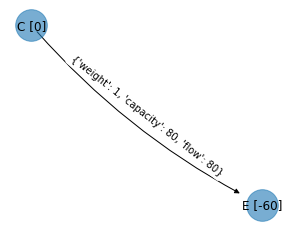

In [136]:
node_labels_simplex_upper_bounds = nx.get_node_attributes(G_simplex_edges_upper_bounds, "node_and_demand")

figsize_tuple = (5, 4)
plot_graph(figsize_tuple, G_simplex_edges_upper_bounds,
           nodes_and_pos,
           nodes_and_pos,
           node_labels_simplex_upper_bounds,
           edge_labels_simplex_upper_bounds)

```{margin}

*Spanning tree* factible anterior dado que el arco que entra es el mismo que sale.

```

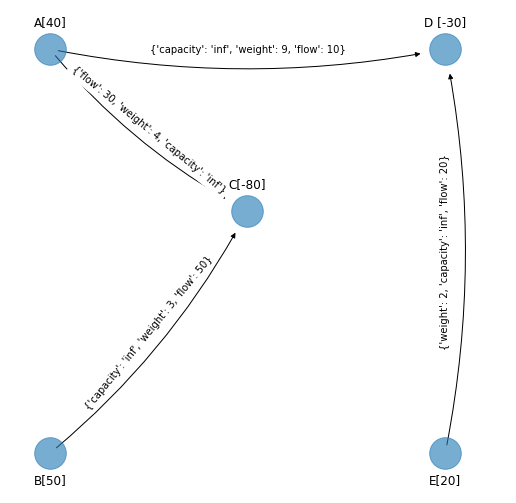

In [138]:
figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_spanning_tree_3,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_3,
           edge_labels_simplex_spanning_tree_3)

In [139]:
flow_plus = 10

In [140]:
edge_to_remove_spanning_tree_4 = ('B', 'A')
edge_to_add_spanning_tree_4 = edge_to_be_added_1

In [141]:
print(edge_to_add_spanning_tree_4)

('B', 'A')


Como el arco que entra es el mismo que sale ... sólo se incrementa el flujo de acuerdo al análisis previo para el *spanning tree* factible anterior el cual se muestra en el margen.

```{margin}

Se incrementa el flujo de la red únicamente en el ciclo por $\text{flow}^+ = 10$ y se elimina el arco $(B,A)$.

```

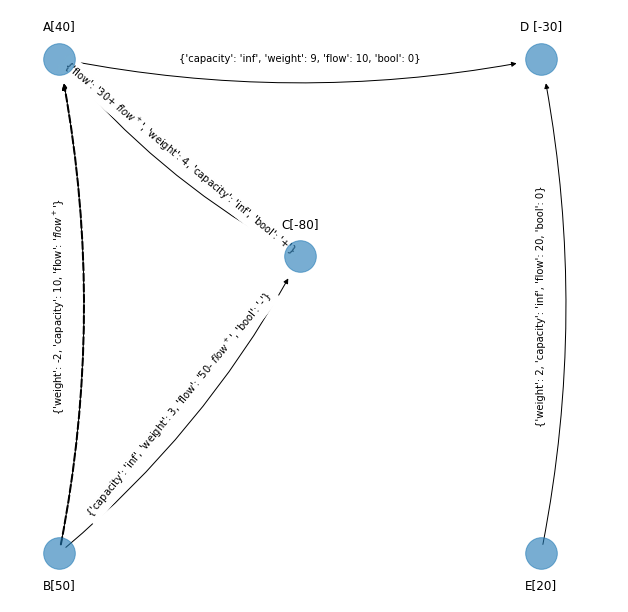

In [143]:
figsize_tuple = (11, 11)
plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_3,
                      edge_labels_simplex_cycle_1_with_flow_change,
                      edge_to_be_added_1)

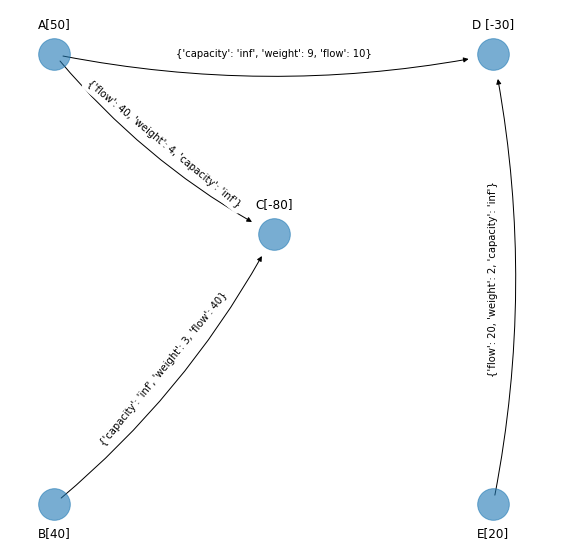

In [145]:
G_simplex_spanning_tree_4 = G_simplex_spanning_tree_3.copy()

G_simplex_spanning_tree_4, edge_labels_simplex_spanning_tree_4 = increase_flow_from_edge_labels_with_flow_change(G_simplex3,
                                                                                                                 G_simplex_spanning_tree_3,
                                                                                                                 G_simplex_spanning_tree_4,
                                                                                                                 edge_to_add_spanning_tree_4,
                                                                                                                 edge_labels_simplex_cycle_1_with_flow_change)
#update demands after upper bound technique
nx.set_node_attributes(G_simplex_spanning_tree_4, {'A': {"demand": new_demand_A,
                                                         "node_and_demand": node_and_demand_A}})
nx.set_node_attributes(G_simplex_spanning_tree_4, {'B': {"demand": new_demand_B,
                                                         "node_and_demand": node_and_demand_B}})

node_labels_simplex_spanning_tree_4 = nx.get_node_attributes(G_simplex_spanning_tree_4, 
                                                            "node_and_demand")

figsize_tuple = (10, 10)
plot_graph(figsize_tuple, G_simplex_spanning_tree_4,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_4,
           edge_labels_simplex_spanning_tree_4)

## Iteración siguiente

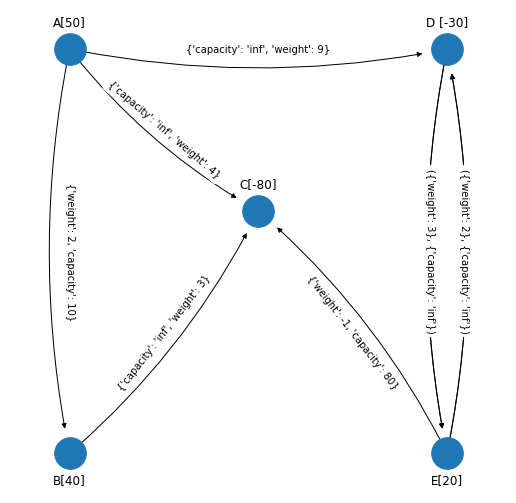

In [147]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex3, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex3,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

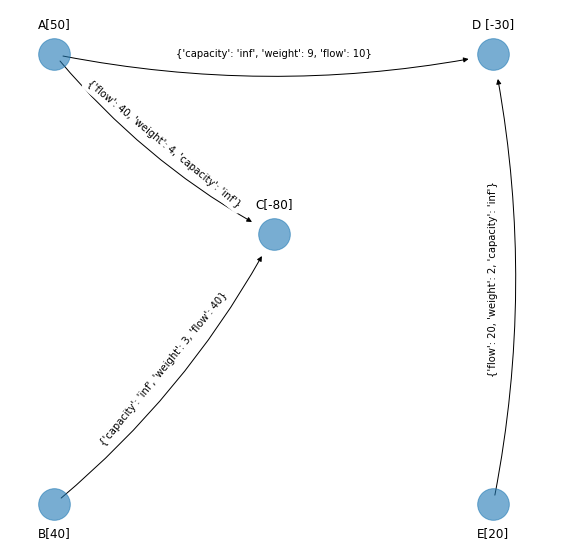

In [149]:
figsize_tuple = (10, 10)
plot_graph(figsize_tuple, G_simplex_spanning_tree_4,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_4,
           edge_labels_simplex_spanning_tree_4)

Identificamos los arcos no básicos que son los que no están en el *spanning tree* factible que se obtuvo al final de la iteración anterior. En el margen se muestra la red y el *spanning tree* factible, entonces los arcos no básicos son $(A,B), (E,C), (D, E)$.

### Revisión de cuál arco no básico sustituye a un arco básico

**Arco $(A,B)$.**

In [150]:
edge_to_be_added_1 = ('A', 'B')

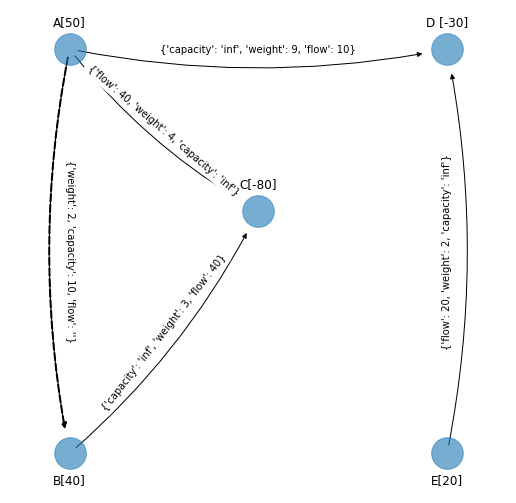

In [152]:
G_simplex_cycle_1, edge_labels_simplex_cycle_1 = add_edge_from_spanning_tree(G_simplex3, G_simplex_spanning_tree_4, 
                                                                             edge_to_be_added_1,
                                                                             edge_labels_simplex_spanning_tree_4)

figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_1,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_4,
                      edge_labels_simplex_cycle_1,
                      edge_to_be_added_1)

In [153]:
cycle_1 = nx.find_cycle(G_simplex_cycle_1, source='B', orientation="ignore")
cycle_1_d = {(t[0], t[1]): t[2] for t in cycle_1}
fix_orientation(cycle_1_d, edge_to_be_added_1)

edges_and_weights_simplex_cycle_1 = nx.get_edge_attributes(G_simplex_cycle_1, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_1_d, 
                                             edges_and_weights_simplex_cycle_1))
     )

1.0


**Arco $(E,C)$.**

In [154]:
edge_to_be_added_2 = ('E', 'C')

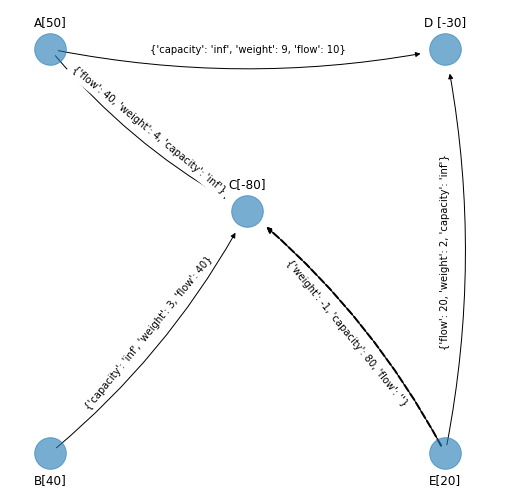

In [156]:
G_simplex_cycle_2, edge_labels_simplex_cycle_2 = add_edge_from_spanning_tree(G_simplex3, G_simplex_spanning_tree_4, 
                                                                             edge_to_be_added_2,
                                                                             edge_labels_simplex_spanning_tree_4)

figsize_tuple = (9, 9)

plot_graph_with_cycle(figsize_tuple, G_simplex_cycle_2,
                      nodes_and_pos,
                      nodes_and_pos_modified,
                      node_labels_simplex_spanning_tree_4,
                      edge_labels_simplex_cycle_2,
                      edge_to_be_added_2)

In [157]:
cycle_2 = nx.find_cycle(G_simplex_cycle_2, source='B', orientation="ignore")
cycle_2_d = {(t[0], t[1]): t[2] for t in cycle_2}
fix_orientation(cycle_2_d, edge_to_be_added_2)

edges_and_weights_simplex_cycle_2 = nx.get_edge_attributes(G_simplex_cycle_2, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_2_d, 
                                             edges_and_weights_simplex_cycle_2))
     )

2.0


**Arco $(D,E)$.**

In [158]:
edge_to_be_added_3 = ('D', 'E')

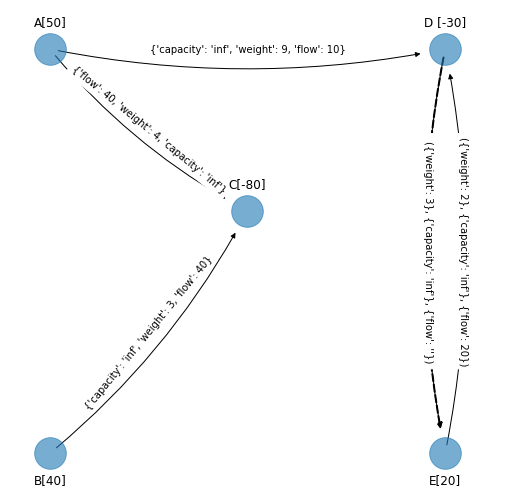

In [160]:
G_simplex_cycle_3, edge_labels_simplex_cycle_3 = add_edge_from_spanning_tree(G_simplex3, G_simplex_spanning_tree_4, 
                                                                             edge_to_be_added_3,
                                                                             edge_labels_simplex_spanning_tree_4)

n1["flow"] = G_simplex_spanning_tree_4['E']['D']["flow"]
n2["flow"] = ""


stri1 = f'{({"weight": n1["weight"]},{"capacity": n1["capacity"]}, {"flow": n1["flow"]},)}'
stri2 = f'\n\n\n'
stri3 = f'{({"weight": n2["weight"]}, {"capacity": n2["capacity"]},{"flow": n2["flow"]})}'
string_for_edges_trouble_to_visualize = {('D', 'E'): ''.join([stri1, stri2, stri3])}

figsize_tuple = (9, 9)
plot_graph_with_cycle_edges_trouble_to_visualize(figsize_tuple,
                                                 G_simplex_cycle_3,
                                                 nodes_and_pos,
                                                 nodes_and_pos_modified,
                                                 node_labels_simplex_spanning_tree_4,
                                                 edge_labels_simplex_cycle_3,
                                                 edge_to_be_added_3,
                                                 string_for_edges_trouble_to_visualize
                                                 )

In [161]:
cycle_3 = nx.find_cycle(G_simplex_cycle_3, source='B', orientation="ignore")
cycle_3_d = {(t[0], t[1]): t[2] for t in cycle_3}
fix_orientation(cycle_3_d, edge_to_be_added_3)

edges_and_weights_simplex_cycle_3 = nx.get_edge_attributes(G_simplex_cycle_3, "weight")

print(np.sum(compute_cost_for_unit_increment(cycle_3_d, 
                                             edges_and_weights_simplex_cycle_3))
     )

5.0


En resúmen:

|Arco | Costo por incrementar una unidad del arco|
|:---:|:---:|
|(A,B)|1|
|(E,C)|2|
|(D,E)|5|

Entonces no hay arcos no básicos que mejoren a $f_o$ por lo que la solución actual es óptima.

## Finalizando el ejemplo

La solución BF se mencionó que corresponde con un *spanning tree* factible, en este caso el dado por:

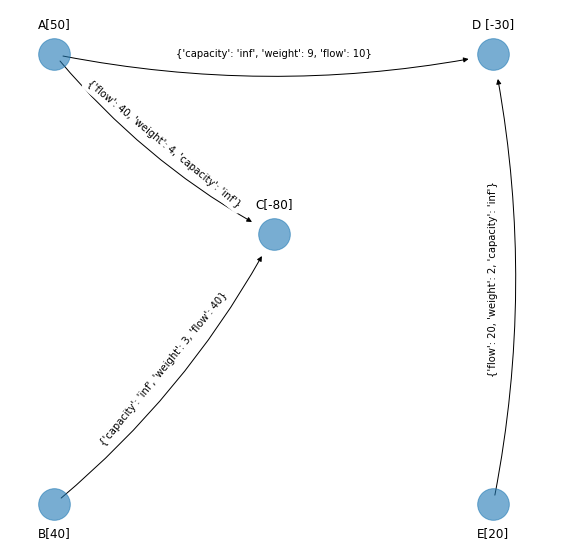

In [163]:
figsize_tuple = (10, 10)
plot_graph(figsize_tuple, G_simplex_spanning_tree_4,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_spanning_tree_4,
           edge_labels_simplex_spanning_tree_4)

LLegando a este punto debemos comparar la red original que tiene los arcos originales y la última red que debido a la técnica de la cota superior cambió a tales arcos. Se presenta a continuación la última red y en el margen a la red original.

```{margin}

Red original del problema:

```

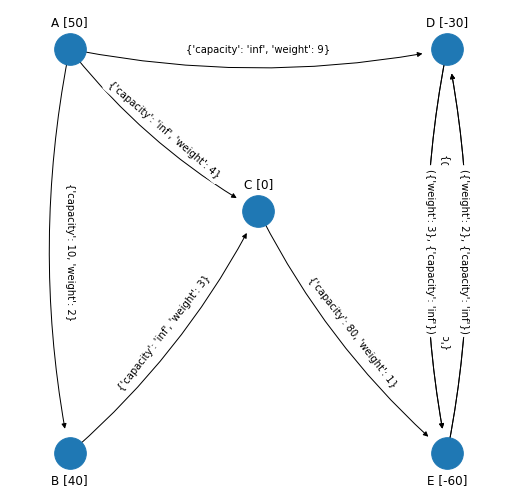

In [165]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_min_cost_flow, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_min_cost_flow,
                                           string_for_edges_trouble_to_visualize_min_cost_flow,
                                           list_of_edges_trouble_to_visualize_min_cost_flow)

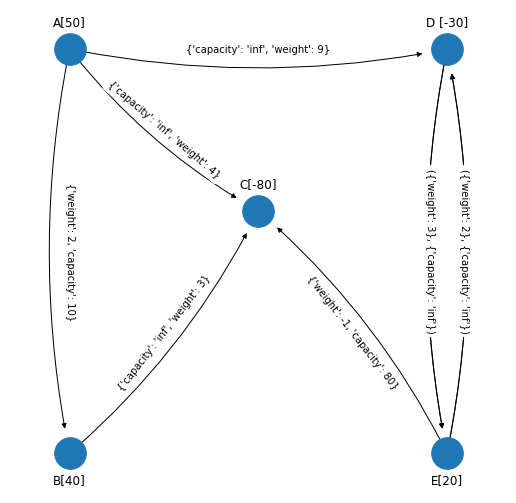

In [167]:
figsize_tuple = (9, 9)
plot_graph_with_edges_trouble_to_visualize(figsize_tuple,
                                           G_simplex3, nodes_and_pos,
                                           nodes_and_pos_modified,
                                           node_labels_simplex3,
                                           string_for_edges_trouble_to_visualize_simplex,
                                           list_of_edges_trouble_to_visualize_simplex)

Observamos que todos los arcos conservar su dirección original salvo el $(C,E)$ que fue cambiado por $(E,C)$. Como se tiene la relación: $y_{CE} = 80 - x_{CE}$ y $y_{CE}$ es un arco no básico entonces: $y_{CE} = 0$ y $x_{CE}=80$:

In [168]:
print(G_simplex_edges_upper_bounds.edges(data=True))

[('C', 'E', {'weight': 1, 'capacity': 80, 'flow': 80})]


por lo que la red final queda (omitiendo arcos con flujo igual a cero):

In [169]:
edge_to_be_added = ('C', 'E')

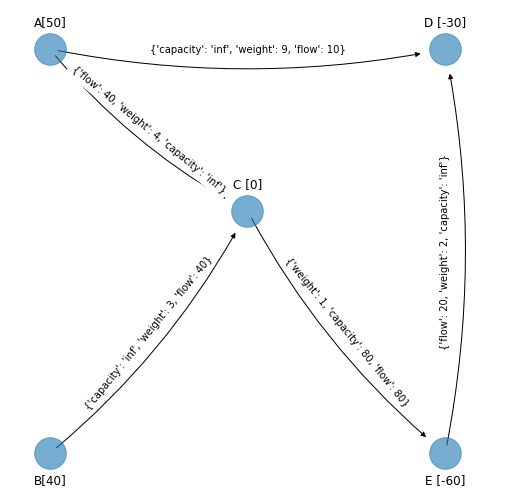

In [171]:
G_simplex_4 = G_simplex_spanning_tree_4.copy()
G_simplex_4.add_edge(edge_to_be_added[0], edge_to_be_added[1])

edge_labels_simplex_4 = copy.deepcopy(edge_labels_simplex_spanning_tree_4)

edge_labels_simplex_4[edge_to_be_added]={}

edge_labels_simplex_4[edge_to_be_added]["weight"] = G_simplex_edges_upper_bounds[edge_to_be_added[0]][edge_to_be_added[1]]["weight"]

edge_labels_simplex_4[edge_to_be_added]["capacity"] = G_simplex_edges_upper_bounds[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"]

edge_labels_simplex_4[edge_to_be_added]["flow"] = G_simplex_edges_upper_bounds[edge_to_be_added[0]][edge_to_be_added[1]]["flow"]


G_simplex_4[edge_to_be_added[0]][edge_to_be_added[1]]["weight"] = edge_labels_simplex_4[edge_to_be_added]["weight"]
G_simplex_4[edge_to_be_added[0]][edge_to_be_added[1]]["capacity"] = edge_labels_simplex_4[edge_to_be_added]["capacity"]
G_simplex_4[edge_to_be_added[0]][edge_to_be_added[1]]["flow"] = edge_labels_simplex_4[edge_to_be_added]["flow"] 


node_labels_simplex_4 = nx.get_node_attributes(G_simplex_4, 
                                               "node_and_demand")

node_attributes_upper_bounds = nx.get_node_attributes(G_simplex_edges_upper_bounds, "node_and_demand")

node_labels_simplex_4[edge_to_be_added[0]] = node_attributes_upper_bounds[edge_to_be_added[0]]

node_labels_simplex_4[edge_to_be_added[1]] = node_attributes_upper_bounds[edge_to_be_added[1]]

figsize_tuple = (9, 9)
plot_graph(figsize_tuple, G_simplex_4,
           nodes_and_pos,
           nodes_and_pos_modified,
           node_labels_simplex_4,
           edge_labels_simplex_4)

In [172]:
print(G_simplex_4.edges(data=True))

[('A', 'D', {'capacity': 'inf', 'weight': 9, 'flow': 10}), ('A', 'C', {'flow': 40, 'weight': 4, 'capacity': 'inf'}), ('B', 'C', {'capacity': 'inf', 'weight': 3, 'flow': 40}), ('C', 'E', {'weight': 1, 'capacity': 80, 'flow': 80}), ('E', 'D', {'flow': 20, 'weight': 2, 'capacity': 'inf'})]


```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.